# **Latar Belakang**
Perusahaan yang bergerak dibidang transportasi yang dirancang sebagai moda tranportasi massal pendukung aktivitas ibu kota yang cukup padat. Perusahaan ini ingin mengetahui sudah sejauh mana perkembangan jumlah penumpang dimana ingin menargetkan 1 juta penumpang perhari sesuai target perusahaan ditahun mendatang.

## **Pernyataan Masalah**
Perusahaan ingin mengetahui **trayek mana saja yang memiliki potensi jumlah pemnumpang yang besar**. Informasi ini akan membantu perusahaan untuk melakukan pengembangan dari beberapa aspek.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Trayek mana saja yang memiliki potensi jumlah penumpang yang besar?**

# **Data**
Untuk menjawab pertanyaan di atas, kita akan menganalisa data  yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1L2BIjpuegENmJfiu4lZ4CcjJhZdFo_8x). 

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi yang terdiri dari 6 kolom di dalam dataset ini, yaitu:  

* tahun : Tahun dimana data dikumpulkan.
* bulan : Bulan dimana data dikumpulkan. 
* jenis : Jenis transportasi penumpang ada 3 (BRT, Mikrotras, Angkutan Umum Integrasi).
* kode trayek : Kode trayek.
* trayek : trayek/jurusan sesuai dengan kode trayek.
* jumlah_penumbang : jumlah penumpang.
 


Berikut 5 baris teratas dan terbawah dari dataset TransJakarta Passengers 2021.

In [146]:
df = pd.read_csv('TransJakarta Passengers 2021.csv')
df

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


## **Data Understanding and Cleaning**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [147]:
df.duplicated().sum()

0

Dari data set tidak ada baris atau isi yang duplikat/mempunyai isi yang sama persis.

In [148]:
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

In [149]:
df[df['trayek'].isna()]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
796,2021,12,Mikrotrans,JAK.10A,NaN,33992


Terdapat missing values pada kolom trayek. Kemudian setelah di telusuri ternyata trayek yang kosong tersebut dengan kode trayek JAK.10B dan JAK.10A dengan jenis kendaraan Mikrotrans pada bulan Desember tahun 2021.

In [150]:
df.loc[795, 'trayek'] = 'Gondangdia - Cikini via Kramat Raya'
df.loc[796, 'trayek'] = 'Gondangdia - Cikini via Salemba Raya'


Missing values tersebut diisi dengan trayek sesuai dengan kode trayek tersebut.

In [151]:
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
dtype: int64

Sudah tidak ada missing values lagi pada data set. Namun perlu dicek kembali apakah ada pengisian data yang salah seperti salah ketik atau lainnya.

In [152]:
list_unik = []


for kolom in df.columns:
    list_unik.append([kolom, df[kolom].nunique(), df[kolom].unique()])

pd.DataFrame(list_unik, columns=['Column Names', 'Number of Unique', 'Unique Values'])

,Column Names,Number of Unique,Unique Values
0,tahun,1,[2021]
1,bulan,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,3,"[Mikrotrans, BRT, Angkutan Umum Integrasi]"
3,kode_trayek,135,"[JAK.88, JAK.85, JAK.84, JAK.80, JA.77, JAK.75..."
4,trayek,136,"[Terminal Tanjung Priok - Ancol Barat, Bintara..."
5,jumlah_penumpang,1420,"[31197, 30711, 40186, 61883, 66616, 50363, 506..."


**Untuk mengetahui dimana trayek mempunyai kode trayek lebih dari 1**

In [153]:
n_trayek = df.groupby('trayek')['kode_trayek'].unique()
n_trayek

trayek
Andara - Stasiun Universitas Pancasila     [JAK.44]
Batu Sari-Tanah Abang                          [8K]
Bintara - Cipinang Indah                   [JAK.85]
Bintaro - Blok M                               [8E]
Blok M - Andara                            [JAK.31]
                                            ...    
Terminal Rawamangun - Cipinang Muara       [JAK.74]
Terminal Tanah Merah - Pulo Gadung        [JAK.112]
Terminal Tanjung Priok - Ancol Barat       [JAK.88]
Tongtek - Cililitan                        [JAK.43]
Ttanjung Priok - Plumpang                  [JAK.01]
Name: kode_trayek, Length: 136, dtype: object

In [154]:
df_trayek = pd.DataFrame(n_trayek)
df_trayek['jumlah']=df_trayek['kode_trayek'].apply(len)
df_trayek[df_trayek['jumlah']>1]

,kode_trayek,jumlah
trayek,,
Cililitan - Condet via Kayu Manis,"[JAK.37, JAK.16]",2
PIK - Balai Kota,"[1A, 1A ]",2
Sentraland Cengkareng - Puri Kembangan,"[3E , 3E]",2
Tanjung Priok - Jembatan Item,"[JA.77, JAK.77]",2


In [155]:
# Kode trayek JAK.16 jurusan "Cililitan - Condet via Kayu Manis" ganti jadi "Cililitan - Condet"
df["trayek"] = np.where(df['kode_trayek']=='JAK.16', 'Cililitan - Condet', df['trayek'])

# Kode trayek "1A " ganti jadi "1A"
df["kode_trayek"] = df["kode_trayek"].str.replace("1A ", "1A")

# Kode trayek "3E " ganti jadi "3E"
df["kode_trayek"] = df["kode_trayek"].str.replace("3E ", "3E")

# Kode trayek "JA.77" ganti jadi "JAK.77"
df["kode_trayek"] = df["kode_trayek"].str.replace("JA.77", "JAK.77")


**Untuk mengetahui dimana kode trayek mempunyai trayek lebih dari 1**

In [156]:
n_kode_trayek = df.groupby('kode_trayek')['trayek'].unique()
n_kode_trayek

kode_trayek
1                                [Blok M - Kota]
10                       [Tanjung Priok - PGC 2]
10K       [Tanjung Priok - Senen via Taman  BMW]
11                [Pulo Gebang - Kampung Melayu]
11D        [Pulo Gebang - Pulo Gadung 2 via PIK]
                           ...                  
JAK.77           [Tanjung Priok - Jembatan Item]
JAK.80               [Rawa Buaya - Rawa Kompeni]
JAK.84    [Terminal Kampung Melayu - Kapin Raya]
JAK.85                [Bintara - Cipinang Indah]
JAK.88    [Terminal Tanjung Priok - Ancol Barat]
Name: trayek, Length: 132, dtype: object

In [157]:
df_kode_trayek = pd.DataFrame(n_kode_trayek)
df_kode_trayek['jumlah']=df_kode_trayek['trayek'].apply(len)
df_kode_trayek[df_kode_trayek['jumlah']>1]

,trayek,jumlah
kode_trayek,,
1A,"[PIK - Balai Kota, Pantai Maju - Balai Kota]",2
3E,"[Sentraland Cengkareng - Puri Kembangan, Puri ...",2
4,"[Pulo Gadung 2 - Tosari, Pulo Ggadung 2 - Tosari]",2
JAK.01,"[Tanjung Priok - Plumpang, Ttanjung Priok - Pl...",2
JAK.41,"[Kampung Melayu - Ppulo Gadung, Kampung Melayu...",2


In [158]:
# Kode trayek 1A jurusan "PIK-Balai Kota" ganti jadi "Pantai Maju-Balai Kota"
df["trayek"] = df["trayek"].str.replace("PIK - Balai Kota", "Pantai Maju - Balai Kota")

# Kode trayek 3E jurusan "Puri Kembangan - Sentraland Cengkareng" ganti jadi "Sentraland Cengkareng - Puri Kembangan"
df["trayek"] = df["trayek"].str.replace("Puri Kembangan - Sentraland Cengkareng", "Sentraland Cengkareng - Puri Kembangan")

# Kode trayek 4 jurusan "Pulo Ggadung 2 - Tosari" ganti jadi "Pulo Gadung 2 - Tosari"
df["trayek"] = df["trayek"].str.replace("Pulo Ggadung 2 - Tosari", "Pulo Gadung 2 - Tosari")

# Kode trayek JAK.01 jurusan "Ttanjung Priok - Plumpang" ganti jadi "Tanjung Priok - Plumpang"
df["trayek"] = df["trayek"].str.replace("Ttanjung Priok - Plumpang", "Tanjung Priok - Plumpang")

# Kode trayel JAK.41 jurusan "Kampung Melayu - Ppulo Gadung" ganti jadi "Kampung Melayu - Pulo Gadung"
df["trayek"] = df["trayek"].str.replace("Kampung Melayu - Ppulo Gadung", "Kampung Melayu - Pulo Gadung")
df["trayek"] = df["trayek"].str.replace(" Kampung Melayu - Pulo Gadung", "Kampung Melayu - Pulo Gadung")

In [159]:
# Kode trayek JAK.10B jurusan "Gondangdia - Cikini via Kramat Jaya" ganti jadi "Gondangdia - Cikini via Kramat Raya"
df["trayek"] = df["trayek"].str.replace("Gondangdia - Cikini via Kramat Jaya", "Gondangdia - Cikini via Kramat Raya")

# Kode trayek 6R jurusan "Ragunan - Stasin MRT Fatmawati" ganti jadi "Ragunan - Stasiun MRT Fatmawati"
df["trayek"] = df["trayek"].str.replace("Ragunan - Stasin MRT Fatmawati", "Ragunan - Stasiun MRT Fatmawati")

# Kode trayek 6C jurusan "Stasin Tebet - Karet via Patra Kuningan" ganti jadi "Stasin Tebet - Karet via Patra Kuningan"
df["trayek"] = df["trayek"].str.replace("Stasin Tebet - Karet via Patra Kuningan", "Stasiun Tebet - Karet via Patra Kuningan")

# Kode trayek "JAK,19" ganti jadi "JAK.19"
df["kode_trayek"] = df["kode_trayek"].str.replace("JAK,19", "JAK.19")

# Kode trayek "JAK. 10B" harus diubah menjadi "JAK.10B"
df["kode_trayek"] = df["kode_trayek"].str.replace("JAK. 10B", "JAK.10B")

# Kode trayek 1E jurusan "Pondok  Labu - Blok M" ganti jadi "Pondok Labu - Blok M"
df["trayek"] = df["trayek"].str.replace("Pondok  Labu - Blok M", "Pondok Labu - Blok M")

# Kode trayek 8K jurusan "Batu Sari-Tanah Abang" ganti jadi "Batu Sari - Tanah Abang"
df["trayek"] = df["trayek"].str.replace("Batu Sari-Tanah Abang", "Batu Sari - Tanah Abang")


In [160]:
list_unik = []


for kolom in df.columns:
    list_unik.append([kolom, df[kolom].nunique(), df[kolom].unique()])

pd.DataFrame(list_unik, columns=['Column Names', 'Number of Unique', 'Unique Values'])

,Column Names,Number of Unique,Unique Values
0,tahun,1,[2021]
1,bulan,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,3,"[Mikrotrans, BRT, Angkutan Umum Integrasi]"
3,kode_trayek,131,"[JAK.88, JAK.85, JAK.84, JAK.80, JAK.77, JAK.7..."
4,trayek,131,"[Terminal Tanjung Priok - Ancol Barat, Bintara..."
5,jumlah_penumpang,1420,"[31197, 30711, 40186, 61883, 66616, 50363, 506..."


In [161]:
df

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


In [162]:
df = df.reset_index(drop=True)
df

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


## **Data Analisis**

In [163]:
from scipy.stats import shapiro

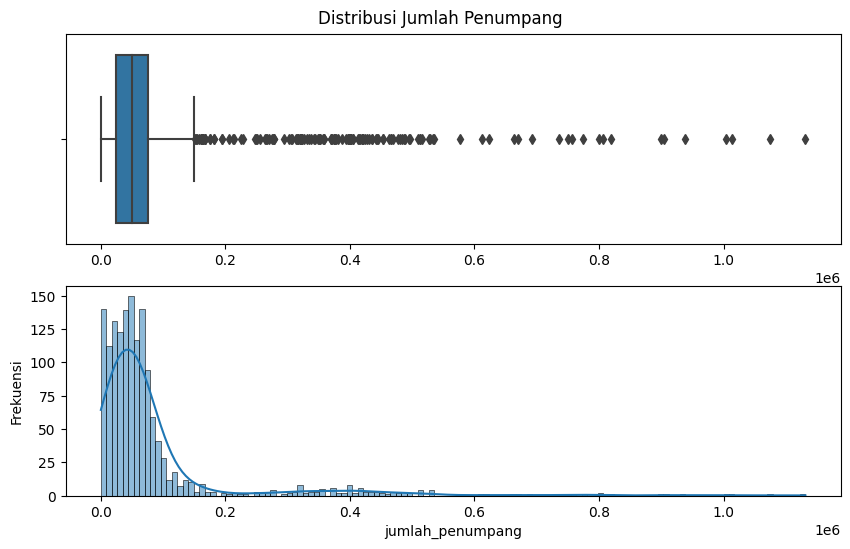

In [164]:
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
sns.boxplot(data=df, x='jumlah_penumpang')
plt.xlabel("")

plt.subplot(2,1,2)
sns.histplot(data=df, x='jumlah_penumpang', kde=True)
plt.ylabel('Frekuensi')


plt.suptitle("Distribusi Jumlah Penumpang", y=0.92)

plt.show()

Cek normalitas distribusi data dari jumlah penumpang dapat dilihat oleh histogram diatas bahwwa data tidak terdistribusi normal. Bisa dilihat bahwa dari grafik cenderung kekanan atau skew right dan juga terdapat outlier.

In [165]:
# Uji normalitas dengan Shapiro

shapiro((df['jumlah_penumpang']))

ShapiroResult(statistic=0.5239834785461426, pvalue=0.0)

In [166]:
stat, pvalue = shapiro(df['jumlah_penumpang'])

if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data TIDAK terdistribusi normal


Dari hasil:
- Histogram : Sebaran data tidak normal, cenderung right skew
- Uji Normalitas : Menggunakan shapiro, nilai p-value <0 artinya data tidak terdistribusi normal

In [167]:
# Memfilter median jumlah penumpang berdasarkan kode trayek

df_med = df.groupby(['jenis','kode_trayek']).median(numeric_only=True).round(0)[['jumlah_penumpang']]
df_med

jumlah_penumpang
jenis                   kode_trayek                  
Angkutan Umum Integrasi 10K                   32706.0
                        11D                   50596.0
                        11Q                    9608.0
                        12A                    1463.0
                        12B                    9252.0
...                                               ...
Mikrotrans              JAK.77                64782.0
                        JAK.80                62482.0
                        JAK.84                40136.0
                        JAK.85                27452.0
                        JAK.88                29571.0

[131 rows x 1 columns]

In [168]:
# Tampilan jumlah penumpang yang 0

df[df['jumlah_penumpang']==0].head()

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
89,2021,10,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0
94,2021,10,Angkutan Umum Integrasi,6R,Ragunan - Stasiun MRT Fatmawati,0
111,2021,10,Angkutan Umum Integrasi,1F,Stasiun Palmerah - Bundaran Senayan,0
211,2021,8,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0
216,2021,8,Angkutan Umum Integrasi,6R,Ragunan - Stasiun MRT Fatmawati,0


In [169]:
# Mengubah jumlah penumpang 0 dengan NaN

df["jumlah_penumpang"] = df["jumlah_penumpang"].replace(0, np.nan)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tahun             1473 non-null   int64  
 1   bulan             1473 non-null   int64  
 2   jenis             1473 non-null   object 
 3   kode_trayek       1473 non-null   object 
 4   trayek            1473 non-null   object 
 5   jumlah_penumpang  1426 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 69.2+ KB


In [171]:
# df[df['jumlah_penumpang'].isna()]

In [172]:
# Mengisi jumlah penumpang yang 0 dengan median sesuai kode trayek

df['jumlah_penumpang']=df['jumlah_penumpang'].fillna(df.groupby(['jenis', 'kode_trayek'])['jumlah_penumpang'].transform('median'))


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tahun             1473 non-null   int64  
 1   bulan             1473 non-null   int64  
 2   jenis             1473 non-null   object 
 3   kode_trayek       1473 non-null   object 
 4   trayek            1473 non-null   object 
 5   jumlah_penumpang  1473 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 69.2+ KB


In [174]:
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
dtype: int64

Data sudah tidak terdapat missing values serta sudah clean

In [175]:
display(df.describe(), df.describe(include='object'))

,tahun,bulan,jumlah_penumpang
count,1473.0,1473.000000,1.473000e+03
mean,2021.0,6.534963,8.246313e+04
std,0.0,3.446451,1.261571e+05
min,2021.0,1.000000,1.000000e+00
25%,2021.0,4.000000,2.609200e+04
50%,2021.0,7.000000,5.008900e+04
75%,2021.0,10.000000,7.521800e+04
max,2021.0,12.000000,1.131439e+06


,jenis,kode_trayek,trayek
count,1473,1473,1473
unique,3,131,131
top,Mikrotrans,3E,Sentraland Cengkareng - Puri Kembangan
freq,848,13,13


- Jumlah penumpang paling tinggi mencapai 1131439 dan paling rendah 1.
- Jenis transportasi penumpang paling banyak yaitu jenis Mikrotrans.
- Trayek yang paling sering muncul yaitu Sentraland Cengkareng - Puri Kembangan.

In [176]:
# Split data, memisahkan pada kolom trayek
# dipisahkan antara awal kebarangkatan dan akhir keberangkatan

df[['mulai', 'berhenti']] = df['trayek'].str.split(pat = ' - ', expand = True)
df

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,mulai,berhenti
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197.0,Terminal Tanjung Priok,Ancol Barat
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711.0,Bintara,Cipinang Indah
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186.0,Terminal Kampung Melayu,Kapin Raya
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883.0,Rawa Buaya,Rawa Kompeni
4,2021,10,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616.0,Tanjung Priok,Jembatan Item
...,...,...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353.0,Kampung Melayu,Pulo Gebang via BKT
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155.0,Pulo Gebang,Pulo Gadung 2 via PIK
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498.0,Tanjung Priok,Senen via Taman BMW
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4.0,Taman Kota Intan,Museum Bahari


In [177]:
df[df['berhenti'].isna()]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,mulai,berhenti
121,2021,10,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,21.0,Kota Tua Explorer,None
243,2021,8,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,8.0,Kota Tua Explorer,None
489,2021,6,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,33.0,Kota Tua Explorer,None
573,2021,1,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,261.0,Kota Tua Explorer,None
731,2021,5,Angkutan Umum Integrasi,GR2,Tanah Abang Explorer,3945.0,Tanah Abang Explorer,None
734,2021,5,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,24.0,Kota Tua Explorer,None
978,2021,9,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,15.0,Kota Tua Explorer,None
1223,2021,7,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,11.0,Kota Tua Explorer,None
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3.0,Kota Tua Explorer,None


In [178]:
# Pada kolom 'berhenti' rubah 'Pulo Gadung ' menjadi 'Pulo Gadung'
df["berhenti"] = df["berhenti"].str.replace("Pulo Gadung ", "Pulo Gadung")

# Pada kolom 'berhenti' rubah 'Kota ' menjadi 'Kota'
df["berhenti"] = df["berhenti"].str.replace("Kota ", "Kota")

# Kode trayek GR5 jurusan "Kota Tua Explorer" ganti jadi "Kota Tua Explorer" di kolom berhenti
df["berhenti"] = np.where(df['kode_trayek']=='GR5', 'Kota Tua Explorer', df['berhenti'])

# Kode trayek GR2 jurusan "Tanah Abang Exploer" ganti jadi "Tanah Abang Exploer" di kolom berhenti
df["berhenti"] = np.where(df['kode_trayek']=='GR2', 'Tanah Abang Explorer', df['berhenti'])


In [179]:
df

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,mulai,berhenti
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197.0,Terminal Tanjung Priok,Ancol Barat
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711.0,Bintara,Cipinang Indah
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186.0,Terminal Kampung Melayu,Kapin Raya
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883.0,Rawa Buaya,Rawa Kompeni
4,2021,10,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616.0,Tanjung Priok,Jembatan Item
...,...,...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353.0,Kampung Melayu,Pulo Gebang via BKT
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155.0,Pulo Gebang,Pulo Gadung2 via PIK
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498.0,Tanjung Priok,Senen via Taman BMW
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4.0,Taman Kota Intan,Museum Bahari


In [180]:
# Mencari rata-rata penumpang tiap bulan dari seluruh jenis transportasi

df_avg_in_month = df.groupby('bulan')['jumlah_penumpang'].sum().reset_index()
df_avg_in_month['rata2 penumpang/hari'] = round(df_avg_in_month['jumlah_penumpang']/30,0)
df_avg_in_month

,bulan,jumlah_penumpang,rata2 penumpang/hari
0,1,9797366.0,326579.0
1,2,9381499.0,312717.0
2,3,11595008.0,386500.0
3,4,11624614.0,387487.0
4,5,10823336.0,360778.0
5,6,11046655.0,368222.0
6,7,6583105.0,219437.0
7,8,6540122.5,218004.0
8,9,8557732.5,285258.0
9,10,10692484.5,356416.0


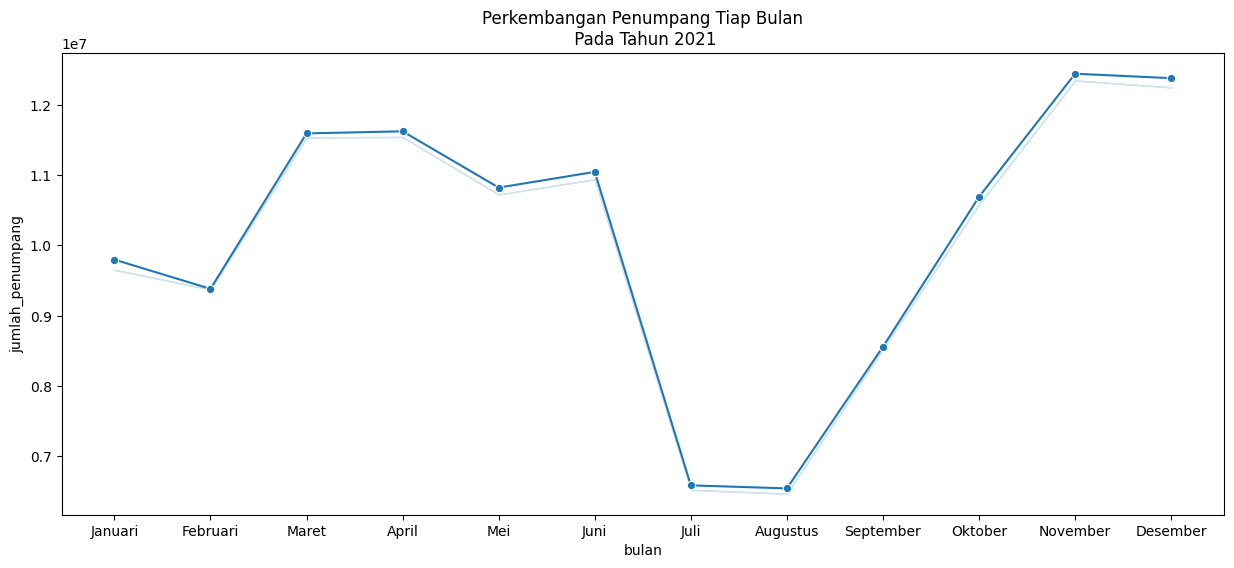

In [181]:
# Membuat lineplot perkembangan penumpang berdasarakan bulan

plt.figure(figsize=(15,6))

sns.lineplot(
    data = df,
    x = "bulan",
    y = "jumlah_penumpang",
    marker='o',
    estimator=sum,
    ci = 0           
)


plt.title('Perkembangan Penumpang Tiap Bulan\n Pada Tahun 2021')

plt.xticks(range(1, 13), ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Augustus', 'September', 'Oktober', 'November', 'Desember'])

plt.show()

Grafik diatas menunjukan perkembangan jumlah penumpang berdasarkan bulan selama tahun 2021 dari seluruh jenis transportasi penumpang. Pada bulan Juni-Juli mengalami penurunan jumlah penumpang yang cukup drastis. Hal ini disebabkan karena pemerintah memberlakukan kebijakan PPKM darurat covid-19 dimana saat itu jumlah kematian meningkat. Sehingga ada batasan dalam kapasitas bus untuk mengangkut penumpang. Kemudian pada bulan Agustus mengalami peningkatan kembali dimana kebijakan PPKM sudah diturunkan levelnya, pada puncaknya jumlah penumpang paling banyak pada bulan November mencapai 12.444.669 penumpang.

In [182]:
# Untuk mengetahui jumlah penumpang berdasarkan jenis transportasi

df_jenis_sum = df.groupby('jenis')[['jumlah_penumpang']].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).round(0)
df_jenis_sum

,jenis,jumlah_penumpang
1,BRT,59111356.0
2,Mikrotrans,49915801.0
0,Angkutan Umum Integrasi,12441036.0


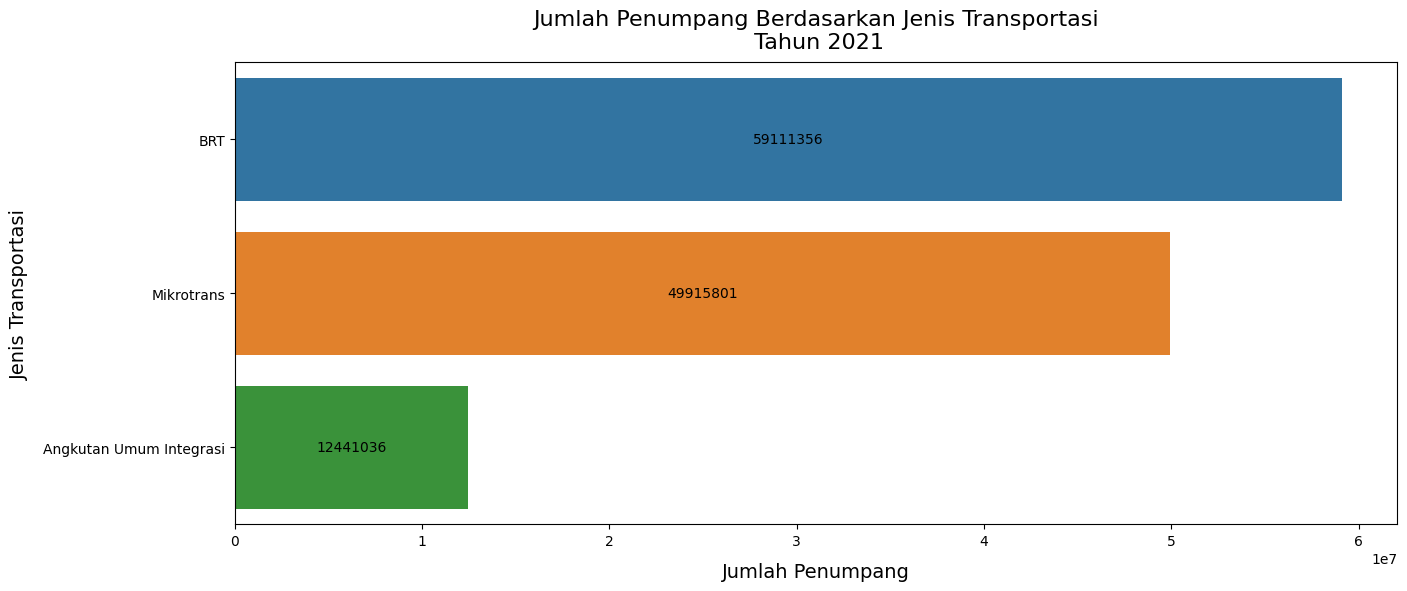

In [183]:
# Membuat barplot jumlah penumpang berdsarkan jenis tranportasi

judul = 'Jumlah Penumpang Berdasarkan Jenis Transportasi\n Tahun 2021'

plt.figure(figsize=(15,6))

ax = sns.barplot(data=df_jenis_sum, x='jumlah_penumpang', y='jenis', ci=0, estimator=np.sum) 


ax.bar_label(ax.containers[0], label_type='center', fmt=lambda x: f'{int(x)}')


plt.title(judul, size = 16, pad = 10) 
plt.xlabel('Jumlah Penumpang', size=14, labelpad=10) 
plt.ylabel('Jenis Transportasi', size=14, labelpad=10) 
plt.show()

- Berdasarakan grafik data diatas jika dilihat jumlah penumpang berdasarakan jenis transportasi penumpang paling banyak dipilih yaitu jenis BRT sebanyak 59.111.356 penumpang selama tahun 2021. BRT menjadi pilihan terbanyak karena memang bus ini memiliki jalur tersendiri dimana hal ini bisa cukup efektif untuk memangkas kemacetan ibu kota.
- Kemudian jenis Mikrotrans mejadi pilihan kedua sebanyak 49.915.801 penumpang selama tahun 2021, dimana Mikrotrans memiliki mobilitas jalan yang cukup kecil.
- Dan terakhir Angkutan Umum Integrasi atau bisa juga disebut Non-BRT sebanyak 12.441.036 selama tahun 2021, bus ini mirip seperti BRT namum tidak memiliki jalur khusus hanya beroperasi dijalan umum.

''

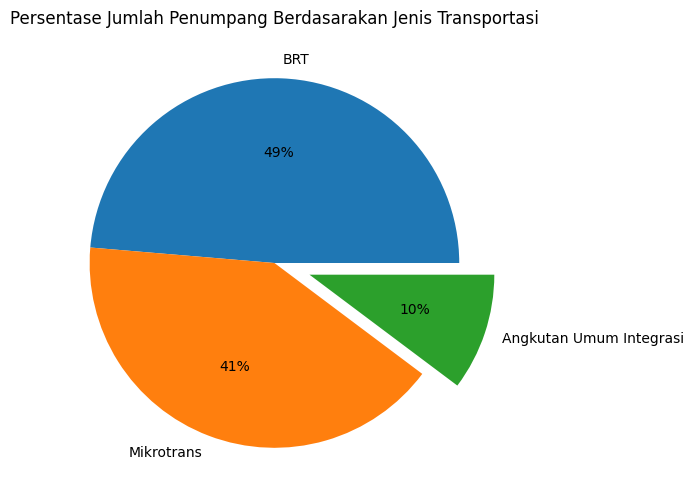

In [184]:
# Membuat piechart jumlah penumpang berdsarkan jenis tranportasi dalam bentuk persentase


fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(df_jenis_sum['jumlah_penumpang'], labels = df_jenis_sum['jenis'], autopct='%1.0f%%', explode=[0.0, 0.0, 0.2])
plt.title('Persentase Jumlah Penumpang Berdasarakan Jenis Transportasi')
;

Seperti sebelumnya sudah dijelaskan bahwa jenis transportasi penumpang BRT mendominasi menjadi pilihan penumpang yaitu sebesar 48.7%. Kemudian diikuti oleh Mikrotrans sebanyak 41.1%. Paling kecil persentasinya yaitu jenis Angkutan Umum Integrasi/Non_BRT sebesar 10.2%.

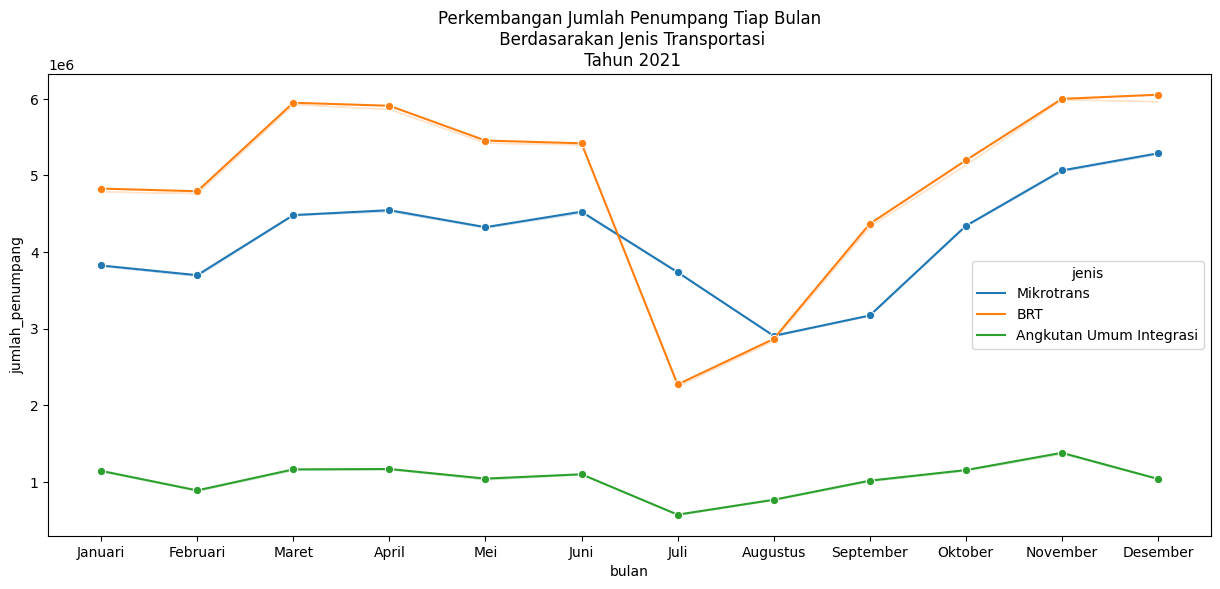

In [185]:
# Membuat lineplot jumlah penumpang tiap bulan berdasarkan jenis transportasi

bulan = df['bulan']
n_penumpang = df['jumlah_penumpang']


plt.figure(figsize=(15,6))

sns.lineplot(
    data = df,
    x = "bulan",
    y = "jumlah_penumpang",
    hue = 'jenis',
    estimator=sum,
    marker='o',
    ci = 0           
)



plt.title('Perkembangan Jumlah Penumpang Tiap Bulan\n Berdasarakan Jenis Transportasi\n Tahun 2021')

plt.xticks(range(1, 13), ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Augustus', 'September', 'Oktober', 'November', 'Desember'])


plt.show()

Dari grafik tersebut bahwa:
- Jenis angkutan penumpang BRT mengalami penuruan yang drastis dari bulan Juni-Juli. Kemudian pada bulan Agutus beranjak naik kembali terus hingga akhir bulan Desember 2021.
- Jenis angkutan penumpang Mikrotrans mengalami penuruan yang cukup drastis dari bulan Juni-Agustus. Kemudian pada bulan September beranjak naik kembali terus hingga akhir bulan Desember 2021.
- Jenis angkutan penumpang Angkutan Umum Intgrasi/Non_BRT mengalami penuruan dari bulan Juni-Juli. Kemudian pada bulan Agustus beranjak naik kembali terus hingga pada puncaknya di bulan November 2021.

In [186]:
n_trayek_by_jenis = df.groupby('jenis')[['trayek']].nunique().reset_index().sort_values('trayek', ascending=False)
n_trayek_by_jenis

,jenis,trayek
2,Mikrotrans,72
0,Angkutan Umum Integrasi,46
1,BRT,13


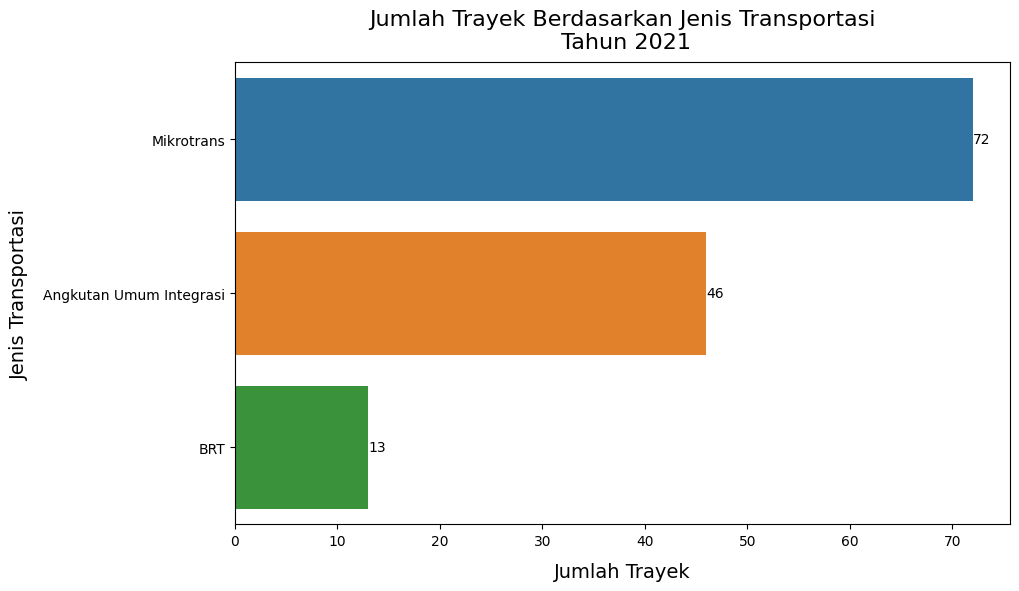

In [187]:
# Membuat barplot jumlah trayek berdsarkan jenis tranportasi

judul = 'Jumlah Trayek Berdasarkan Jenis Transportasi\n Tahun 2021'

plt.figure(figsize=(10,6))

ax = sns.barplot(data=n_trayek_by_jenis, x='trayek', y='jenis', ci=0)

for i in ax.containers:
            ax.bar_label(i,)


plt.title(judul, size = 16, pad = 10) 
plt.xlabel('Jumlah Trayek', size=14, labelpad=10) 
plt.ylabel('Jenis Transportasi', size=14, labelpad=10) 
plt.show()

Dari segi jumlah trayek bawah jenis transportasi Mikrotrans memliki jumlah trayek yang paling banyak dari jenis transportasi lainnya dengan nilai jumlah trayek sebanyak 72 trayek. Mikrotrans sendiri merupakan jenis kendaraan seperti mobil kecil pada umumnya atau yang lebih dikenal dengan nama Angkot (Angkutan Kota). Hal ini memungkinkan untuk beroperasi di jalanan umum yang sulit dijangkau oleh kendaraan besar seperti BRT atau Angkutan Umum Integrasi.

In [188]:
# Mencari 5 teratas jumlah penunpang berdasarkan trayek
df_trayek_top5 = df.groupby('trayek')[['jumlah_penumpang']].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head()
df_trayek_top5

,trayek,jumlah_penumpang
5,Blok M - Kota,10079752.0
73,Pinang Ranti - Pluit,7694406.0
34,Kalideres - Pasar Baru,5250726.0
58,Lebak Bulus - Harmoni,5122397.0
37,Kampung Melayu - Ancol,4902814.0


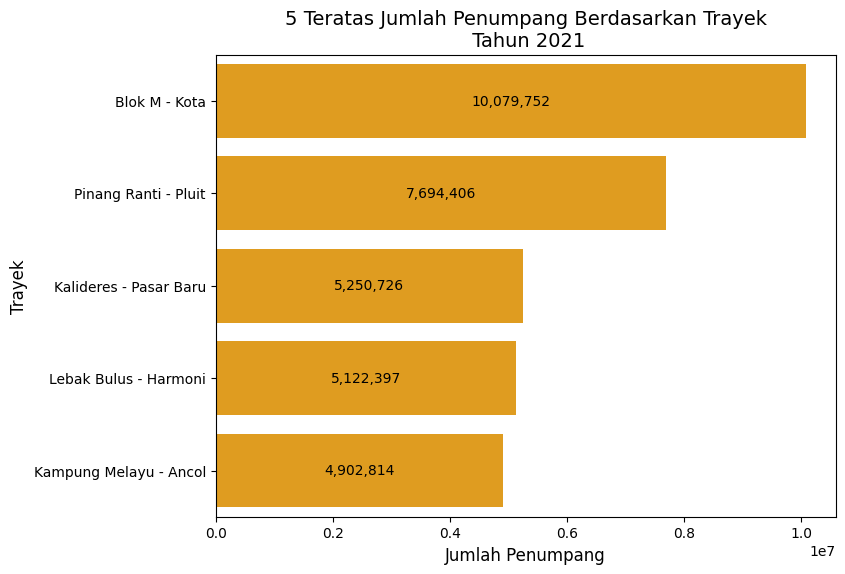

In [189]:
# Membuat barplot 5 teratas jumlah penumpang berdasarkan trayek

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_trayek_top5, x='jumlah_penumpang', y='trayek', ci=0, color='orange')
plt.title('5 Teratas Jumlah Penumpang Berdasarkan Trayek\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Trayek', size = 12)

plt.show()

Secara umum dari semua jenis transportasi maupun seluruh trayek dari 5 teratas jumlah penumpang berdasarakan trayek bahwa trayek Blok M - Kota (jenis transportasi BRT dengan kode trayek 1) menyumbang jumlah penumpang terbanyak yaitu sebesar 10079752 penumpang. Kemudian dari 5 teratas jumlah penumpang berdasarakan trayek tersebut paling rendah yaitu pada trayek Kampung Melayu - Ancol (jenis transportasi BRT dengan kode trayek 5).

In [190]:
# Mencari 5 terendah jumlah penunpang berdasarkan trayek
df_trayek_bot5 = df.groupby('trayek')[['jumlah_penumpang']].sum().reset_index().sort_values('jumlah_penumpang', ascending=True).head()
df_trayek_bot5

,trayek,jumlah_penumpang
110,Taman Kota Intan - Museum Bahari,232.0
53,Kota Tua Explorer,376.0
103,Stasiun Manggarai - Ragunan,377.0
18,Dukuh Atas - Casablanca via Epicentrum Raya,608.0
85,Ragunan - Departemen Pertanian,1386.0


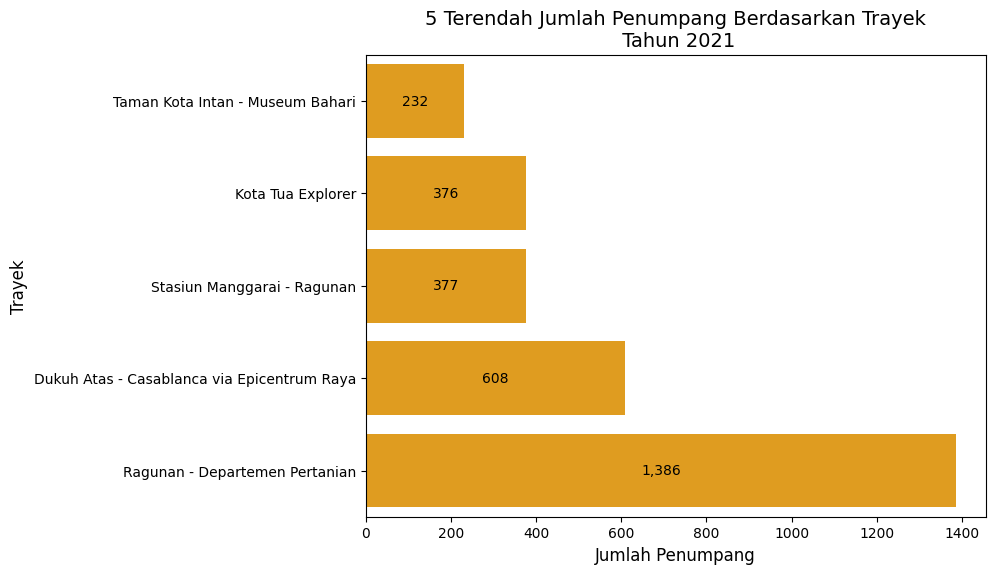

In [191]:
# Membuat barplot 5 terendah jumlah penumpang berdasarkan trayek

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_trayek_bot5, x='jumlah_penumpang', y='trayek', ci=0, color='orange')
plt.title('5 Terendah Jumlah Penumpang Berdasarkan Trayek\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Trayek', size = 12)

plt.show()

Secara umum dari semua jenis transportasi maupun seluruh trayek dari 5 terendah jumlah penumpang berdasarakan trayek bahwa trayek Taman Kota Intan - Museum Bahari (jenis transportasi Angktuan Umum Integrasi dengan kode trayek GR4) menyumbang jumlah penumpang paling rendah yaitu sebesar 232 penumpang selama tahun 2021. Kemudian dari 5 teredah jumlah penumpang berdasarakan trayek tersebut paling tinggi yaitu pada trayek Ragunan - Departemen Pertanian (jenis transportasi Angkutan Umum Integrasi dengan kode trayek GR3).

In [192]:
# Mencari 5 teratas jumlah penumpang berdasarkan titik awal keberangkatan

df_mulai = df.groupby('mulai')[['jumlah_penumpang']].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head()
df_mulai

,mulai,jumlah_penumpang
4,Blok M,10805732.0
40,Pinang Ranti,9348174.0
25,Kampung Rambutan,8565885.0
64,Tanjung Priok,8462513.0
24,Kampung Melayu,7873387.0


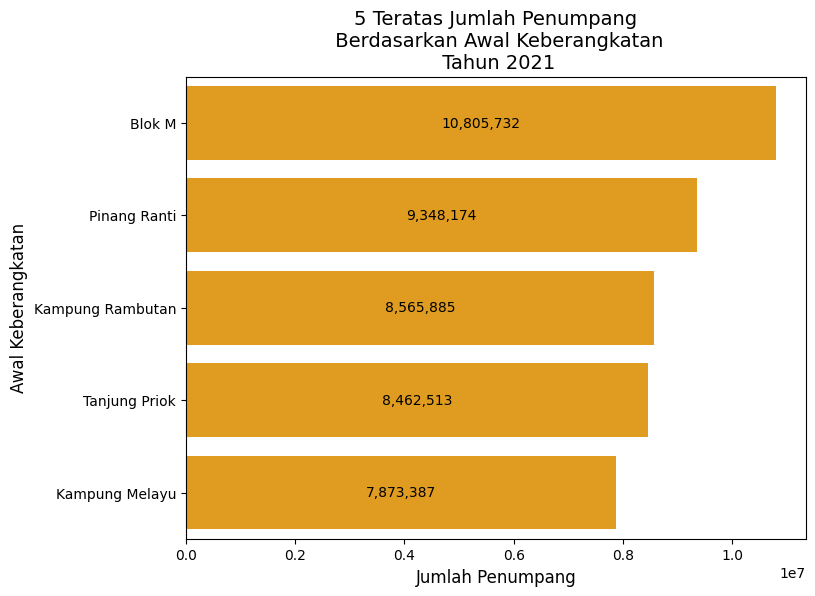

In [193]:
# Membuat barplot 5 teratas jumlah penumpang berdasarkan titik awal keberangkatan

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_mulai, x='jumlah_penumpang', y='mulai', ci=0, color='orange')
plt.title('5 Teratas Jumlah Penumpang\n Berdasarkan Awal Keberangkatan\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Awal Keberangkatan', size = 12)

plt.show()

Dari keseluruhan jenis transportasi dan seluruh trayek jika melihat dari 5 teratas titik awal keberangkatan jumlah penumpang paling banyak berangkat dari halte blok M yaitu sebanyak 10805732 penumpang. Sedangkan yang paling rendah yaitu pada halte Kampung Melayu sebanyak 7873387 penumpang.

In [194]:
# Mencari 5 teratas jumlah penumpang berdasarkan titik berhenti/tujuan

df_berhenti = df.groupby('berhenti')[['jumlah_penumpang']].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head()
df_berhenti

,berhenti,jumlah_penumpang
41,Kota,11280907.0
28,Harmoni,8958928.0
59,Pluit,7694406.0
33,Kampung Melayu,5975832.0
53,Pasar Baru,5250726.0


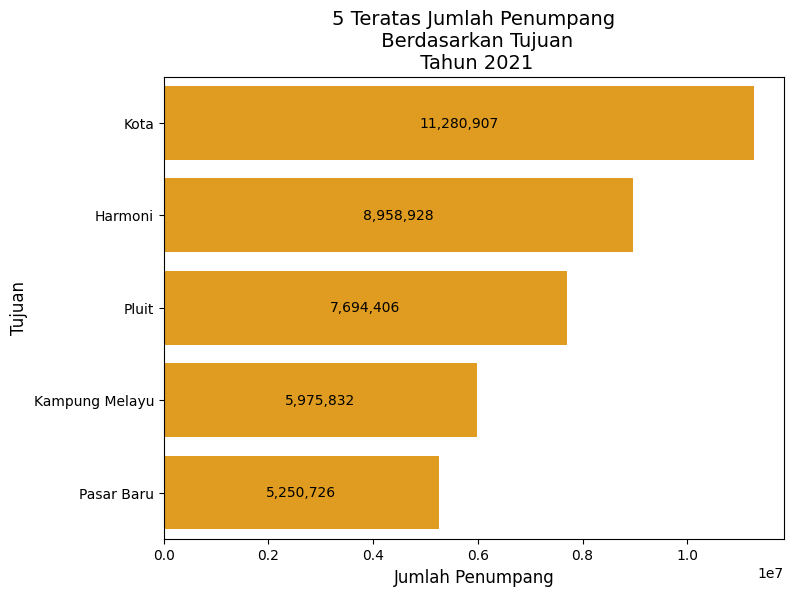

In [195]:
# Membuat barplot TOP 5 jumlah penumpang berdasarkan titik berhenti/tujuan

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_berhenti, x='jumlah_penumpang', y='berhenti', ci=0, color='orange')
plt.title('5 Teratas Jumlah Penumpang\n Berdasarkan Tujuan\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Tujuan', size = 12)

plt.show()

Dari keseluruhan jenis transportasi dan seluruh trayek jika melihat dari 5 teratas titik akhir atau tujuan jumlah penumpang paling banyak dari halte Kota yaitu sebanyak 10697791 penumpang. Sedangkan yang paling rendah yaitu pada halte Pasar Baru sebanyak 5250726 penumpang.

In [196]:
# Mencari  5 terbawah jumlah penumpang berdasarkan titik awal Keberangkatan

df_mulai_bot = df.groupby('mulai')[['jumlah_penumpang']].sum().reset_index().sort_values('jumlah_penumpang', ascending=True).head()
df_mulai_bot

,mulai,jumlah_penumpang
61,Taman Kota Intan,232.0
28,Kota Tua Explorer,376.0
14,Dukuh Atas,608.0
37,Pelabuhan Kaliadem,1463.0
63,Tanah Abang Explorer,3945.0


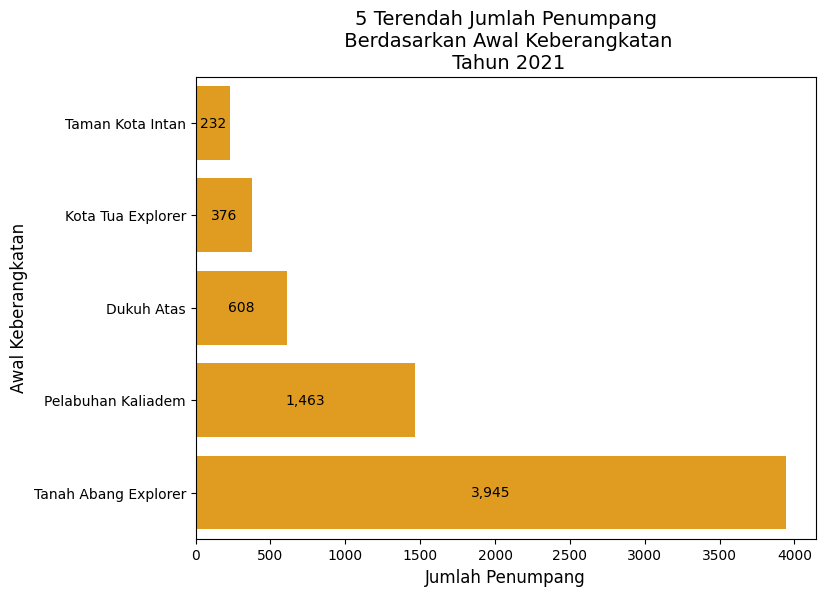

In [197]:
# Membuat barplot 5 terbawah jumlah penumpang berdasarkan titik awal keberangkatan

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_mulai_bot, x='jumlah_penumpang', y='mulai', ci=0, color='orange')
plt.title('5 Terendah Jumlah Penumpang\n Berdasarkan Awal Keberangkatan\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Awal Keberangkatan', size = 12)

plt.show()

Dari keseluruhan jenis transportasi dan seluruh trayek berdasarakan 5 terendah jumlah penumpang berdasarakan titik awal keberangkatan, penumpang paling sedikit berangkat dari halte Taman Kota Intan yaitu sebanyak 232 penumpang selama tahun 2021. Kemudian paling banyak dari 5 terendah yaitu dari halte Tanah Abang Explorer sebanyak 3945 penumpang.

In [198]:
# Mencari 5 terbawah jumlah penumpang berdasarkan titik akhir/tujuan

df_berhenti_bot = df.groupby('berhenti')[['jumlah_penumpang']].sum().reset_index().sort_values('jumlah_penumpang', ascending=True).head()
df_berhenti_bot

,berhenti,jumlah_penumpang
51,Museum Bahari,232.0
42,Kota Tua Explorer,376.0
13,Casablanca via Epicentrum Raya,608.0
23,Departemen Pertanian,1386.0
86,Tanah Abang Explorer,3945.0


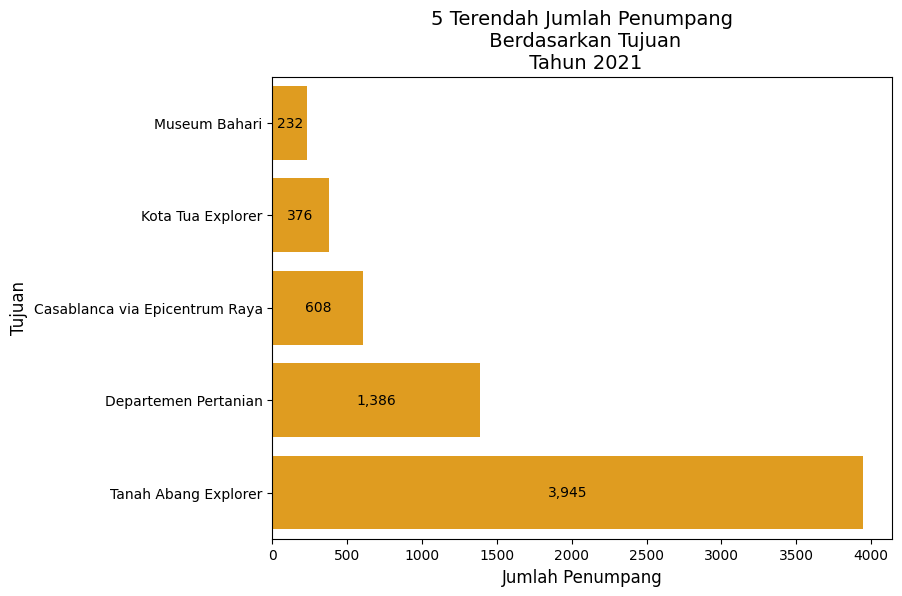

In [199]:
# Membuat barplot 5 terbawah jumlah penumpang berdasarkan titik akhir/tujuan

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_berhenti_bot, x='jumlah_penumpang', y='berhenti', ci=0, color='orange')
plt.title('5 Terendah Jumlah Penumpang\n Berdasarkan Tujuan\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Tujuan', size = 12)

plt.show()

Dari keseluruhan jenis transportasi dan seluruh trayek berdasarakan 5 terendah jumlah penumpang berdasarakan akhir atau tujuan, penumpang paling sedikit menuju halte Museum Bahari yaitu sebanyak 232 penumpang selama tahun 2021. Kemudian paling banyak dari 5 terendah yaitu menuju halte Stasiun MRT Fatmawati sebanyak 22781 penumpang.

In [200]:
# mencari 10 teratas dari titik awal keberangkatan terbanyak ke berbagai tujuan

df_top5_mulai =  df.groupby('mulai')[['trayek']].nunique().reset_index().sort_values('trayek', ascending=False).head(10)
df_top5_mulai

,mulai,trayek
62,Tanah Abang,8
24,Kampung Melayu,7
25,Kampung Rambutan,6
64,Tanjung Priok,6
30,Lebak Bulus,5
55,Senen,5
17,Grogol,5
48,Ragunan,4
11,Cililitan,4
16,Gondangdia,4


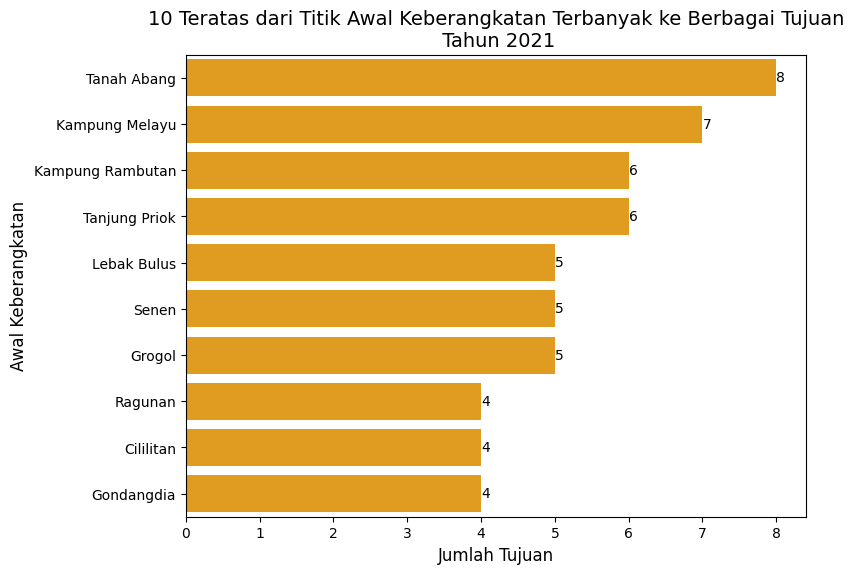

In [201]:
# Membuat barplot 5 teratas dari titik awal keberangkatan terbanyak ke berbagai tujuan

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_top5_mulai, x='trayek', y='mulai', ci=0, color='orange')
plt.title('10 Teratas dari Titik Awal Keberangkatan Terbanyak ke Berbagai Tujuan\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars])

plt.xlabel('Jumlah Tujuan', size = 12)
plt.ylabel('Awal Keberangkatan', size = 12)

plt.show()

Dari 10 teratas dari titik awal keberangkatan bahwa pada Halte Tanah Abang menjadi halte terbanyak yang mempunya jumlah tujuan ke halte-halte lain yaitu sebesar 8 halte tujuan. Antara lain trayek tersebut adalah:
- Tanah Abang - Meruya (JAK.14, Mikrotrans)
- Tanah Abang - Kota Intan via Jembatan Lima (JAK.13, Mikrotrans)
- Tanah Abang - Kebayoran Lama via Pos Pengumben (JAK.12, Mikrotrans)
- Tanah Abang - Kebayoran Lama (JAK.11, Mikrotrans)
- Tanah Abang - Kota (JAK.10, Mikrotrans)
- Tanah Abang - Grogol via Tawakal (JAK.07, Mikrotrans)
- Tanah Abang - Blok M (1N, Angkutan Umum Integrasi)
- Tanah Abang - Stasiun Gondangdia (1H, Angkutan Umum Integrasi)

Jenis Mikrotrans mendominasi untuk keberangkatan dari halte Tanah Abang. Mikrotrans memang mempunya keunggulan yaitu bisa melewati jalanan umum yang tidak terlalu besar yang tidak bisa dilalui oleh Bus.
Sedangkan dari 10 teratas yang paling rendah jumlah tujuannya yaitu Ragunan, Cililitan, dan Gondangdia

In [202]:
# mencari 10 teratas ke titik akhir tujuan terbanyak dari berbagai keberangkatan

df_top5_berhenti = df.groupby('berhenti')[['trayek']].nunique().reset_index().sort_values('trayek', ascending=False).head(10)
df_top5_berhenti

,berhenti,trayek
9,Blok M,9
85,Tanah Abang,5
41,Kota,4
64,Pulo Gadung,4
73,Rorotan,3
25,Duren Sawit,3
34,Kampung Rambutan,2
12,Bundaran Senayan,2
17,Cililitan,2
33,Kampung Melayu,2


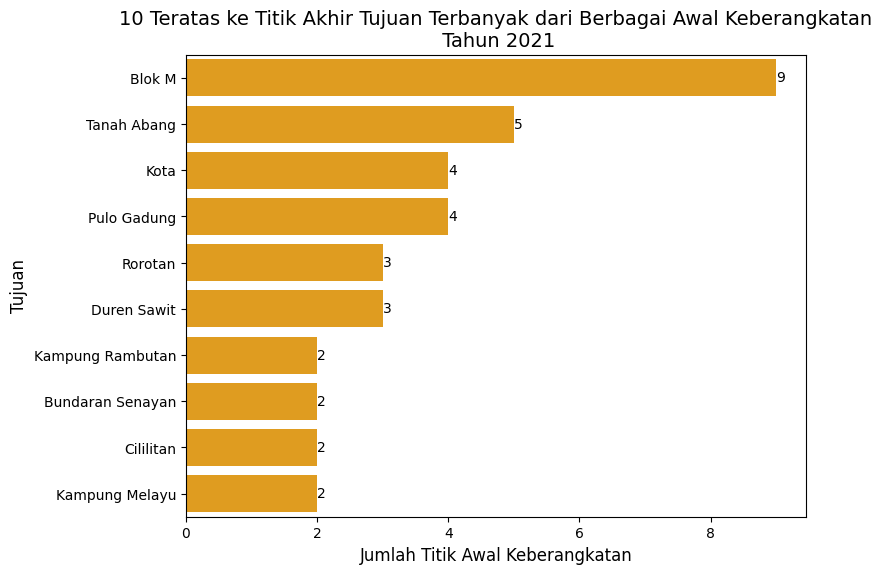

In [203]:
# Membuat barplot 10 teratas ke titik akhir tujuan terbanyak dari berbagai keberangkatan

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_top5_berhenti, x='trayek', y='berhenti', ci=0, color='orange')
plt.title('10 Teratas ke Titik Akhir Tujuan Terbanyak dari Berbagai Awal Keberangkatan\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars])

plt.xlabel('Jumlah Titik Awal Keberangkatan', size = 12)
plt.ylabel('Tujuan', size = 12)

plt.show()

Dari 10 teratas ke titik akhir atau tujuan terbanyak dari berbagai awal keberangkatan Halte Blok M menjadi halte yang paling banyak menjadi titik akhir atau tujuan dari beberapa halte, disini terdapat 9 kedatangan menuju halte Blok M antara lain:
- Cipedak - Blok M (9H, Angkutan Umum Integrasi)
- Bintaro - Blok M (8E, Angkutan Umum Integrasi)
- Joglo - Blok M (8D, Angkutan Umum Integrasi)
- Kampung Rambutan - Blok M (7B, Angkutan Umum Integrasi)
- Rempoa - Blok M (1Q, Angkutan Umum Integrasi)
- Tanah Abang - Blok M (1N, Angkutan Umum Integrasi)
- Meruya - Blok M (1M, Angkutan Umum Integrasi)
- Pondok  Labu - Blok M (1E, Angkutan Umum Integrasi)
- Pesanggrahan - Blok M (1C, Angkutan Umum Integrasi)

Semua dari 9 kedatangan meunuju Blok M merupakan jenis transportasi jenis Angkutan Umum Integrasi. Sedangkan dari 10 terbawah yaitu Halte Senen, Harmoni, Kampung Rambutan, dan Puri Kembangan masing-masing 2 titik awal keberangkatan menuju halte tersebut.

### **BRT**

In [204]:
# Memfilter hanya jenis transportasi BRT

df_brt = df[df['jenis']=='BRT']

In [205]:
# Mencari 5 teratas jumlah penumpang berdasarkan trayek pada jenis BRT 

df_brt_trayek_top5 = df_brt.groupby('trayek')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head(5)
df_brt_trayek_top5

,trayek,jumlah_penumpang
0,Blok M - Kota,10079752.0
7,Pinang Ranti - Pluit,7694406.0
2,Kalideres - Pasar Baru,5250726.0
5,Lebak Bulus - Harmoni,5122397.0
3,Kampung Melayu - Ancol,4902814.0


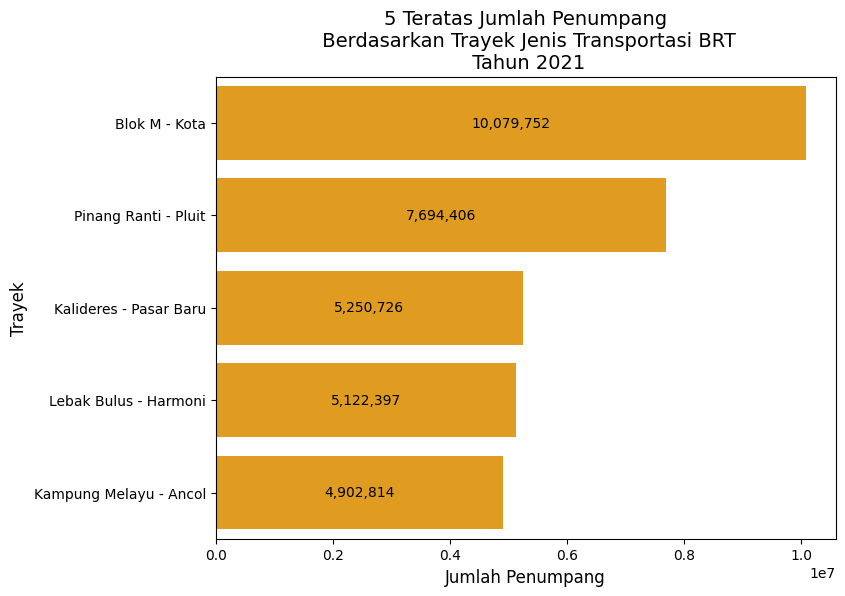

In [206]:
# Membuat barplot 5 teratas jumlah penumpang BRT berdasarkan trayek

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_brt_trayek_top5, x='jumlah_penumpang', y='trayek', ci=0, color='orange')
plt.title('5 Teratas Jumlah Penumpang\n Berdasarkan Trayek Jenis Transportasi BRT\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Trayek', size = 12)

plt.show()

Berikut ini adalah 5 teratas trayek yang memberikan jumlah penumpang terbanyak untuk jenis transportasi penumpang BRT. Trayek dengan jurusan Blok M - Kota menjadi urutan pertama dengan menyumbangkan jumlah penumpang sebanyak 10079752 penumpang selama tahun 2021. Kemudian trayek Kampung Melayu - Ancol yang paling rendah dimana menyumbangkan jumlah penumpang sebanyak 4902814 penumpang.

In [207]:
# Mencari 5 terendah jumlah penumpang berdasarkan trayek pada jenis BRT 

df_brt_trayek_bot5 = df_brt.groupby('trayek')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=True).head(5)
df_brt_trayek_bot5

,trayek,jumlah_penumpang
10,Pulo Gebang - Kampung Melayu,1603385.0
6,Penjaringan - Sunter Bouleverd Barat,1620307.0
9,Pulo Gadung 2 - Tosari,3032454.0
1,Ciledug - Tendean,3337261.0
8,Pulo Gadung 1 - Harmoni,3836531.0


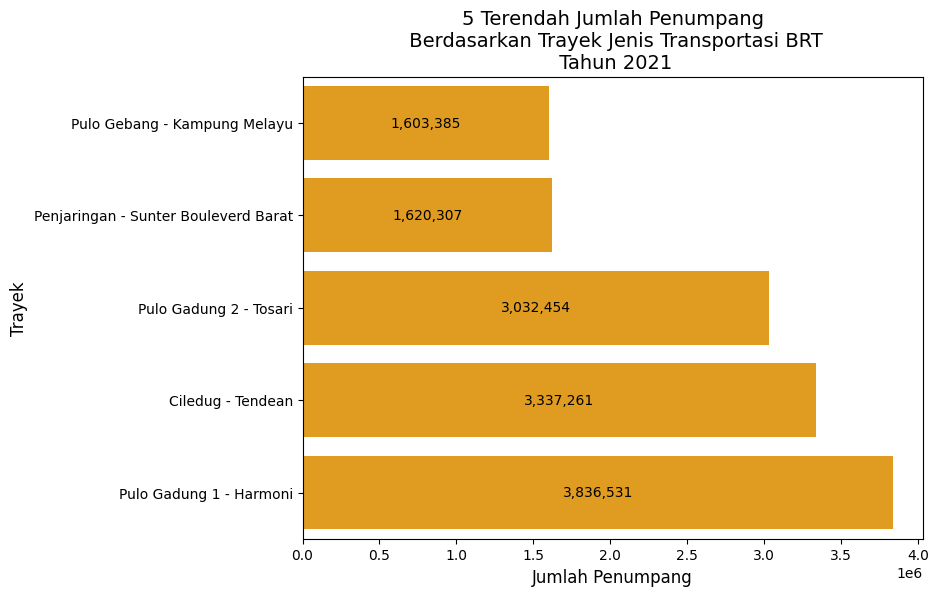

In [208]:
# Membuat barplot 5 terendah jumlah penumpang BRT berdasarkan trayek

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_brt_trayek_bot5, x='jumlah_penumpang', y='trayek', ci=0, color='orange')
plt.title('5 Terendah Jumlah Penumpang\n Berdasarkan Trayek Jenis Transportasi BRT\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Trayek', size = 12)

plt.show()

Berikut ini adalah 5 terendah jumlah penumpang berdasarakan trayek untuk jenis transportasi penumpang BRT. Trayek dengan jurusan Pulo Gebang - Kampung Melayu menjadi urutan pertama terendah dengan menyumbangkan jumlah penumpang sebanyak 1603385 penumpang selama tahun 2021. Kemudian pada 5 terendah ini trayek Pulo Gadung - Harmoni yang paling tinggi dimana menyumbangkan jumlah penumpang sebanyak 3836531 penumpang.

In [209]:
# Mencari 5 teratas jumlah penumpang berdasarkan titik awal/Keberangkatan pada jenis BRT 

df_brt_mulai_top5 = df_brt.groupby('mulai')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head()
df_brt_mulai_top5

,mulai,jumlah_penumpang
0,Blok M,10079752.0
7,Pinang Ranti,7694406.0
2,Kalideres,5250726.0
5,Lebak Bulus,5122397.0
3,Kampung Melayu,4902814.0


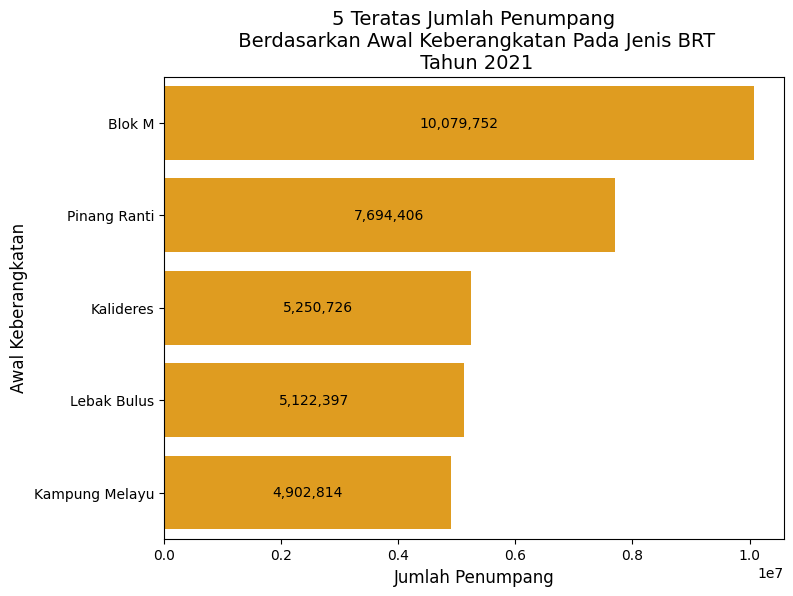

In [210]:
# Membuat barplot 5 teratas jumlah penumpang berdasarkan titik awal/Keberangkatan pada jenis BRT 

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_brt_mulai_top5, x='jumlah_penumpang', y='mulai', ci=0, color='orange')
plt.title('5 Teratas Jumlah Penumpang\n Berdasarkan Awal Keberangkatan Pada Jenis BRT\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Awal Keberangkatan', size = 12)

plt.show()

Grafik diatas bahwa dari 5 teratas jumlah penumpang berdasarakan titik awal keberangkatan pada jenis transportasi penumpang jenis BRT bahwa hari Halte Blok M menjadi paling banyak menyumbangkan jumlah penumpang paling banyak yaitu sebesar 10079752 pengumpang selama tahun 2021. Kemudian dari 5 teratas tersebut Halte Kampung Melayu menjadi yang terendah yaitu sebesar 4902814 penumpang.

In [211]:
# Mencari 5 teratas jumlah penumpang berdasarkan titik akhir/tujuan pada jenis BRT 

df_brt_stop_top5 = df_brt.groupby('berhenti')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head()
df_brt_stop_top5

,berhenti,jumlah_penumpang
4,Kota,10079752.0
2,Harmoni,8958928.0
7,Pluit,7694406.0
3,Kampung Melayu,5975832.0
6,Pasar Baru,5250726.0


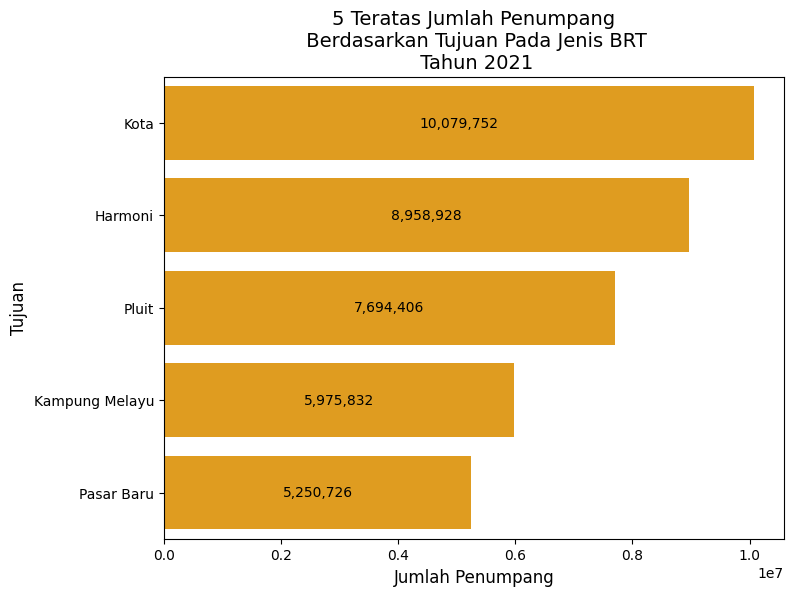

In [212]:
# Membuat barplot 5 teratas jumlah penumpang berdasarkan Tujuan pada jenis BRT 

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_brt_stop_top5, x='jumlah_penumpang', y='berhenti', ci=0, color='orange')
plt.title('5 Teratas Jumlah Penumpang\n Berdasarkan Tujuan Pada Jenis BRT\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Tujuan', size = 12)

plt.show()

Grafik diatas bahwa dari 5 teratas jumlah penumpang berdasarakan titik akhir atau tujuan pada jenis transportasi penumpang jenis BRT bahwa hari Halte Kota menjadi paling banyak menyumbangkan jumlah penumpang paling banyak yaitu sebesar 10079752 pengumpang selama tahun 2021. Kemudian dari 5 teratas tersebut Halte Pasar Baru menjadi yang terendah yaitu sebesar 5250726 penumpang.

In [213]:
# Mencari 5 terendah jumlah penumpang berdasarkan titik awal keberangkatan pada jenis BRT 

df_brt_mulai_bot5 = df_brt.groupby('mulai')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=True).head()
df_brt_mulai_bot5

,mulai,jumlah_penumpang
10,Pulo Gebang,1603385.0
6,Penjaringan,1620307.0
9,Pulo Gadung 2,3032454.0
1,Ciledug,3337261.0
8,Pulo Gadung 1,3836531.0


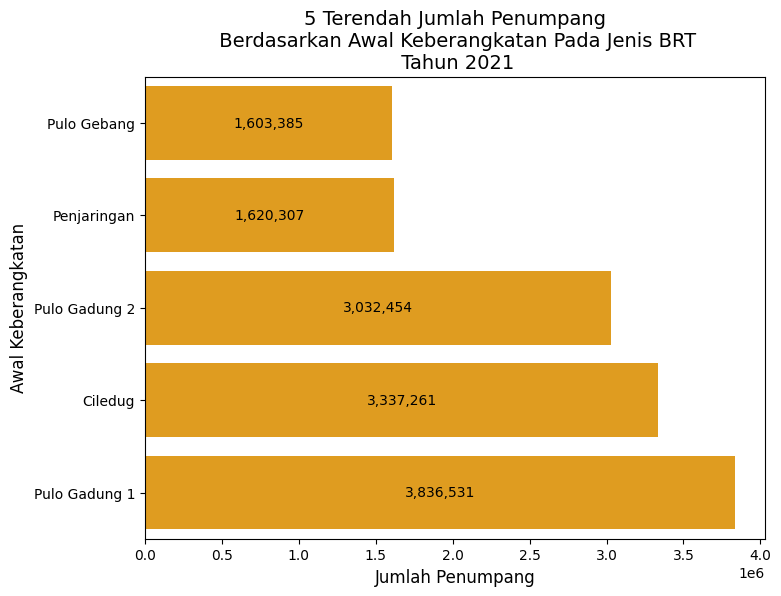

In [214]:
# Membuat barplot 5 terendah jumlah penumpang berdasarkan titik awal keberangkatan pada jenis BRT 

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_brt_mulai_bot5, x='jumlah_penumpang', y='mulai', ci=0, color='orange')
plt.title('5 Terendah Jumlah Penumpang\n Berdasarkan Awal Keberangkatan Pada Jenis BRT\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Awal Keberangkatan', size = 12)

plt.show()

Grafik diatas bahwa dari 5 terendah jumlah penumpang berdasarakan titik awal keberangkatan pada jenis transportasi penumpang jenis BRT bahwa Halte Pulo Gebang menjadi paling rendah menyumbangkan jumlah penumpang yaitu sebesar 1603385 pengumpang selama tahun 2021. Kemudian dari 5 terendah tersebut Pulo Gadung menjadi yang terbanyak yaitu sebesar 3836531 penumpang.

In [215]:
# Mencari 5 terendah jumlah penumpang berdasarkan titik akhir/tujuan pada jenis BRT 

df_brt_stop_bot5 = df_brt.groupby('berhenti')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=True).head()
df_brt_stop_bot5

,berhenti,jumlah_penumpang
8,Sunter Bouleverd Barat,1620307.0
10,Tosari,3032454.0
9,Tendean,3337261.0
1,Dukuh Atas 2,3996604.0
5,PGC 2,4262272.0


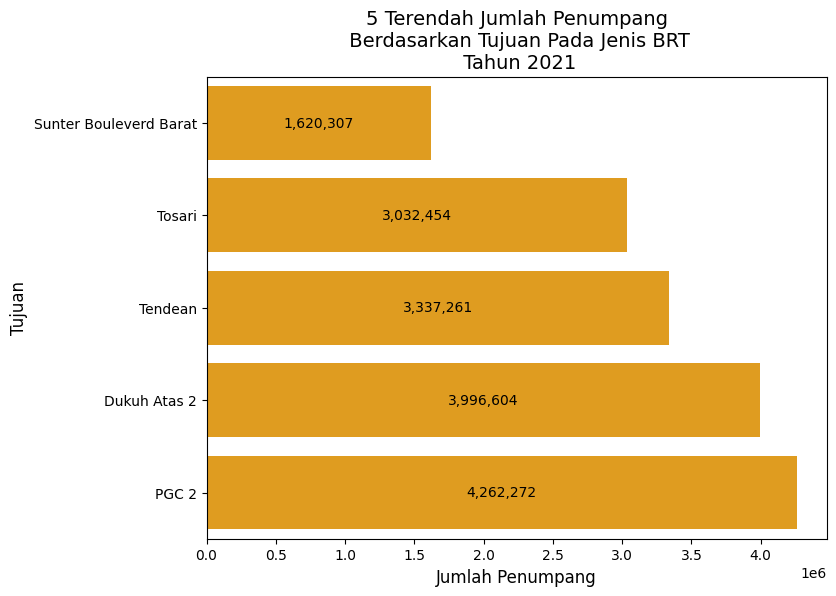

In [216]:
# Membuat barplot 5 terendah jumlah penumpang berdasarkan titik akhir/tujuan pada jenis BRT 

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_brt_stop_bot5, x='jumlah_penumpang', y='berhenti', ci=0, color='orange')
plt.title('5 Terendah Jumlah Penumpang\n Berdasarkan Tujuan Pada Jenis BRT\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Tujuan', size = 12)

plt.show()

Grafik diatas bahwa dari 5 terendah jumlah penumpang berdasarakan titik akhir atau tujuan pada jenis transportasi penumpang jenis BRT bahwa halte Sunter Bouleverd Bara menjadi paling rendah menyumbangkan jumlah penumpang yaitu sebesar 1620307 pengumpang selama tahun 2021. Kemudian dari 5 terendah tersebut halte PGC 2 menjadi yang terbanyak yaitu sebesar 4262272 penumpang.

### **Mikrotrans**

In [217]:
# Memfilter hanya jenis transportasi Mikrotrans

df_mk = df[df['jenis']=='Mikrotrans']


In [218]:
# Mencari 5 teratas jumlah penumpang berdasarkan trayek pada jenis Mikrotrans

df_mk_tyayek_top5 = df_mk.groupby('trayek')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head()
df_mk_tyayek_top5

,trayek,jumlah_penumpang
17,Grogol - Meruya via Roxy,1614991.0
4,Bulak Turi - Tanjung Priok,1463311.0
65,Tanjung Priok - Sukapura,1325037.0
44,Pinang Ranti - Kampung Rambutan,1240998.0
56,Taman Kota - Budi Luhur,1211167.0


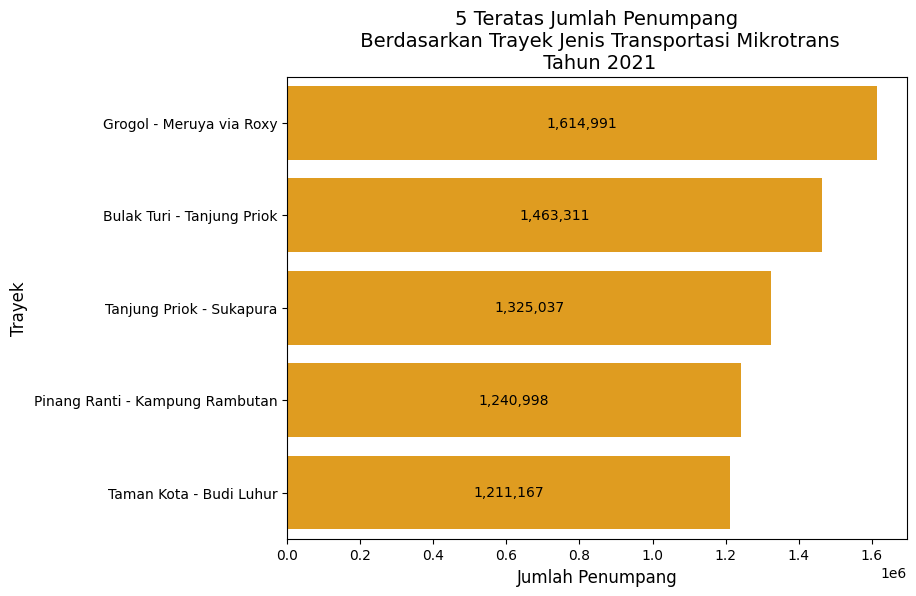

In [219]:
# Membuat barplot jumlah penumpang Mikrotrans berdasarkan trayek

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_mk_tyayek_top5, x='jumlah_penumpang', y='trayek', ci=0, color='orange')
plt.title('5 Teratas Jumlah Penumpang\n Berdasarkan Trayek Jenis Transportasi Mikrotrans\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Trayek', size = 12)

plt.show()

Berikut ini adalah 5 teratas trayek yang memberikan jumlah penumpang terbanyak untuk jenis transportasi penumpang Mikrotrans. Trayek dengan jurusan Grogol - Meruya via Roxy menjadi urutan pertama dengan menyumbangkan jumlah penumpang sebanyak 1614991 penumpang. Kemudian trayek Taman Kota - Budi Luhur yang paling rendah dimana menyumbangkan jumlah penumpang sebanyak 1211167 penumpang.

In [220]:
# Mencari 5 terendah jumlah penumpang berdasarkan trayek pada jenis Mikrotrans 

df_mk_trayek_bot5 = df_mk.groupby('trayek')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=True).head(5)
df_mk_trayek_bot5

,trayek,jumlah_penumpang
14,Gondangdia - Cikini via Kramat Raya,14057.0
15,Gondangdia - Cikini via Salemba Raya,100536.0
61,Tanah Abang - Kota Intan via Jembatan Lima,205995.0
52,Roxy Mas - Karet,281827.0
13,Dwikora - Penas Kalimalang,297091.0


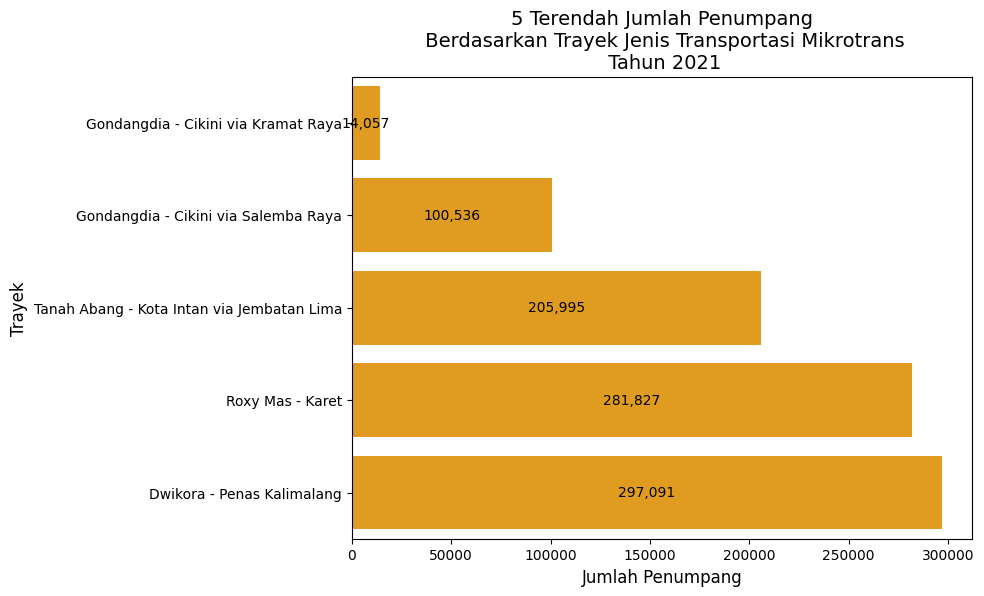

In [221]:
# Membuat barplot 5 terendah jumlah penumpang Mikrotrans berdasarkan trayek

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_mk_trayek_bot5, x='jumlah_penumpang', y='trayek', ci=0, color='orange')
plt.title('5 Terendah Jumlah Penumpang\n Berdasarkan Trayek Jenis Transportasi Mikrotrans\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Trayek', size = 12)

plt.show()

Berdasarakan grafik diatas bahwa dari 5 terendah jumlah penumpang berdasarakan trayek pada jenis transportasi Mikrotrans trayek yang paling rendah dalam menyumbang jumlah penumpang yaitu pada trayek Gondangdia - Cikini via Kramat Raya yaitu sebesar 14057 penumpang selama tahun 2021. Kemudian dari 5 terendah tersebut trayek yang memberikan jumlah penumpang yang tinggi adalah trayek Dwikora - Penas Kalimalang sebesar 297091 penumpang.

In [222]:
# Mencari 5 teratas jumlah penumpang berdasarkan titik awal/Keberangkatan pada jenis Mikrotrans 

df_mk_mulai_top5 = df_mk.groupby('mulai')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head()
df_mk_mulai_top5

,mulai,jumlah_penumpang
36,Tanah Abang,4045082.0
37,Tanjung Priok,3803953.0
12,Grogol,3726022.0
8,Cililitan,2832658.0
19,Kampung Rambutan,2651027.0


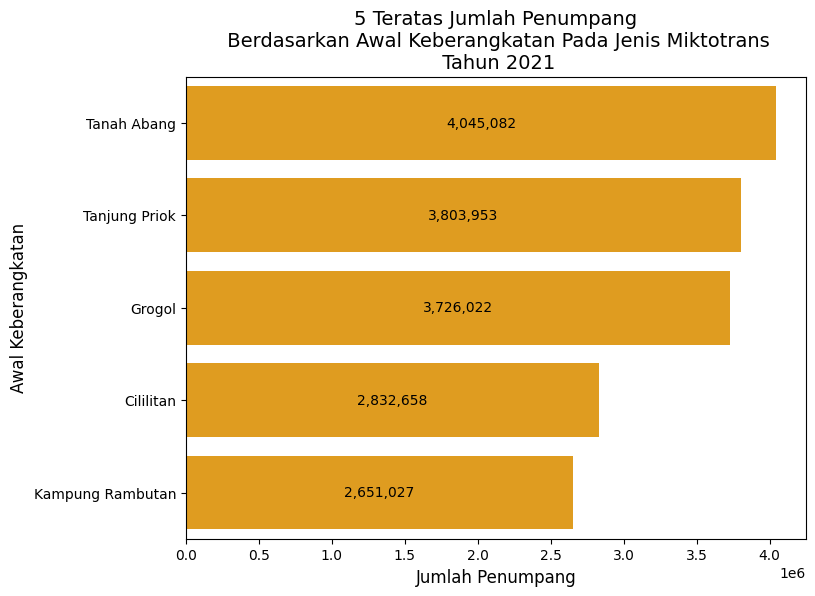

In [223]:
# Membuat barplot 5 teratas jumlah penumpang berdasarkan titik awal/Keberangkatan pada jenis Mikrotrans

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_mk_mulai_top5, x='jumlah_penumpang', y='mulai', ci=0, color='orange')
plt.title('5 Teratas Jumlah Penumpang\n Berdasarkan Awal Keberangkatan Pada Jenis Miktotrans\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Awal Keberangkatan', size = 12)

plt.show()

Grafik diatas bahwa dari 5 teratas jumlah penumpang berdasarakan titik awal keberangkatan pada jenis transportasi penumpang jenis Mikrotrans bahwa hari Halte Tanah Abang menjadi paling banyak menyumbangkan jumlah penumpang paling banyak yaitu sebesar 4045082 pengumpang selama tahun 2021. Kemudian dari 5 teratas tersebut Halte Kampung Rambutan menjadi yang terendah yaitu sebesar 2651027 penumpang.

In [224]:
# Mencari 5 terendah jumlah penumpang berdasarkan titik awal/Keberangkatan pada jenis Mikrotrans 

df_mk_stop_top5 = df_mk.groupby('berhenti')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head()
df_mk_stop_top5

,berhenti,jumlah_penumpang
50,Rorotan,2482554.0
8,Cililitan,1954319.0
20,Kampung Rambutan,1798194.0
14,Duren Sawit,1767836.0
43,Pulo Gadung,1619903.0


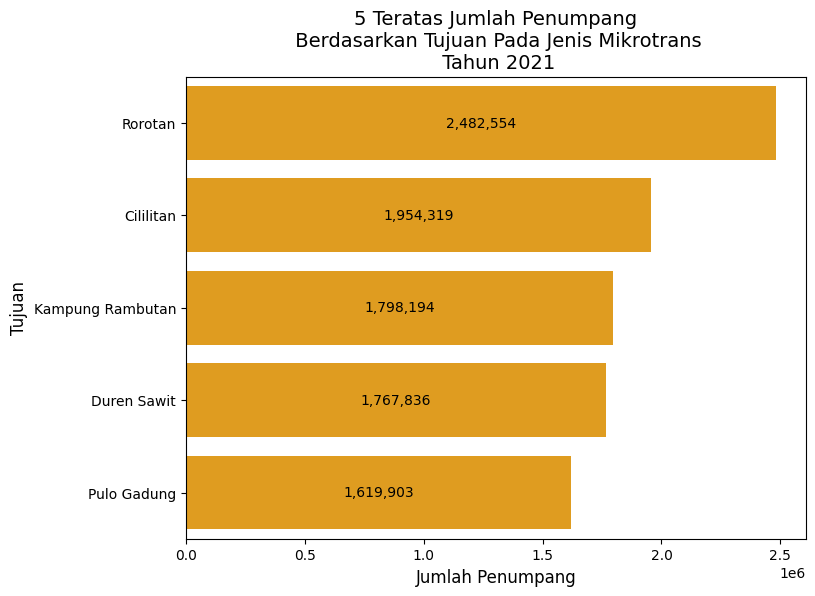

In [225]:
# Membuat barplot 5 teratas jumlah penumpang berdasarkan titik awal/Keberangkatan pada jenis Mikrotrans

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_mk_stop_top5, x='jumlah_penumpang', y='berhenti', ci=0, color='orange')
plt.title('5 Teratas Jumlah Penumpang\n Berdasarkan Tujuan Pada Jenis Mikrotrans\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Tujuan', size = 12)

plt.show()

Grafik diatas bahwa dari 5 teratas jumlah penumpang berdasarakan titik akhir atau tujuan pada jenis transportasi penumpang jenis Mikrotrans bahwa hari Halte Rorotan menjadi paling banyak menyumbangkan jumlah penumpang paling banyak yaitu sebesar 2482554 pengumpang selama tahun 2021. Kemudian dari 5 teratas tersebut Halte Meruya menjadi yang terendah yaitu sebesar 1614991 penumpang.

In [226]:
# Mencari 5 terendah jumlah penumpang berdasarkan titik awal keberangkatan pada jenis Mikrotrans 

df_mk_mulai_bot5 = df_mk.groupby('mulai')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=True).head()
df_mk_mulai_bot5

,mulai,jumlah_penumpang
11,Gondangdia,114593.0
32,Roxy Mas,281827.0
10,Dwikora,297091.0
41,Terminal Tanjung Priok,332037.0
1,Bintara,334063.0


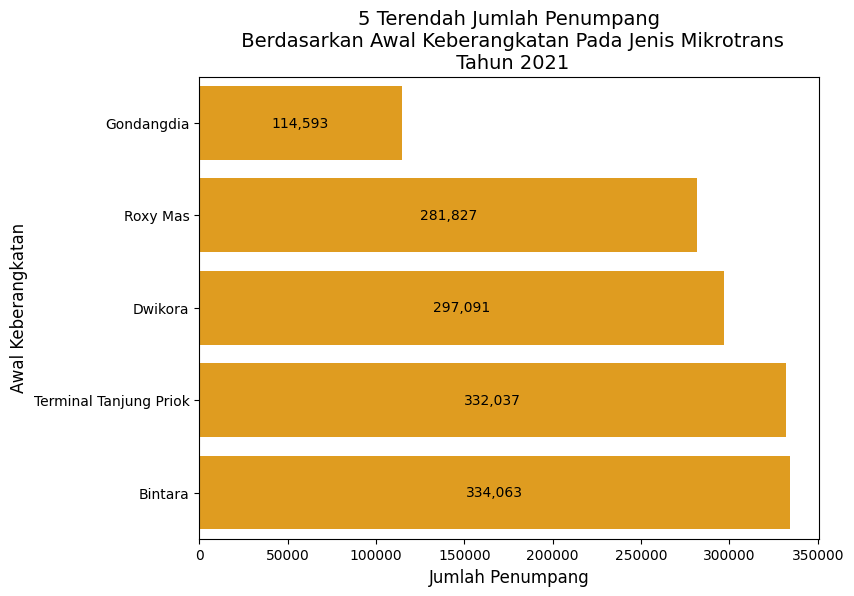

In [227]:
# Membuat barplot 5 terendah jumlah penumpang berdasarkan titik awal keberangkatan pada jenis Mikrotrans 

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_mk_mulai_bot5, x='jumlah_penumpang', y='mulai', ci=0, color='orange')
plt.title('5 Terendah Jumlah Penumpang\n Berdasarkan Awal Keberangkatan Pada Jenis Mikrotrans\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Awal Keberangkatan', size = 12)

plt.show()

Grafik diatas bahwa dari 5 terendah jumlah penumpang berdasarakan titik awal keberangkatan pada jenis transportasi penumpang jenis Mikrotrnas bahwa Halte Gondangdia menjadi paling rendah menyumbangkan jumlah penumpang yaitu sebesar 114593 pengumpang selama tahun 2021. Kemudian dari 5 terendah tersebut Halte Bintara menjadi yang terbanyak yaitu sebesar 334063 penumpang.

In [228]:
# Mencari 5 terendah jumlah penumpang berdasarkan titik akhir/tujuan pada jenis Mikrotrans

df_mk_stop_bot5 = df_mk.groupby('berhenti')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=True).head()
df_mk_stop_bot5

,berhenti,jumlah_penumpang
6,Cikini via Kramat Raya,14057.0
7,Cikini via Salemba Raya,100536.0
27,KotaIntan via Jembatan Lima,205995.0
22,Karet,281827.0
36,Penas Kalimalang,297091.0


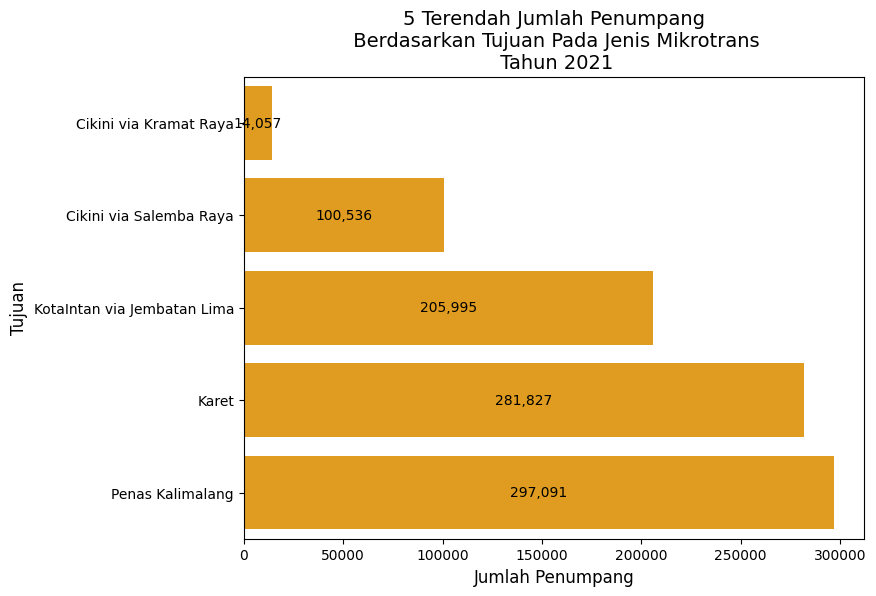

In [229]:
# Membuat barplot 5 terendah jumlah penumpang berdasarkan titik akhir/tujuan pada jenis Mikrotrans

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_mk_stop_bot5, x='jumlah_penumpang', y='berhenti', ci=0, color='orange')
plt.title('5 Terendah Jumlah Penumpang\n Berdasarkan Tujuan Pada Jenis Mikrotrans\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Tujuan', size = 12)

plt.show()

Grafik diatas bahwa dari 5 terendah jumlah penumpang berdasarakan titik akhir atau tujuan pada jenis transportasi penumpang jenis Mikrotrans bahwa Halte Cikini via Kramat Raya menjadi paling rendah menyumbangkan jumlah penumpang yaitu sebesar 14057 pengumpang selama tahun 2021. Kemudian dari 5 terendah tersebut Halte Penas Kalimalang menjadi yang terbanyak yaitu sebesar 297091 penumpang.

### **Angkutan Integrasi Umum**

In [230]:
# Memfilter hanya jenis transportasi Angkutan Integrasi Umum

df_aui = df[df['jenis']=='Angkutan Umum Integrasi']


In [231]:
# Mencari 5 teratas jumlah penumpang berdasarkan trayek pada jenis Angkutan Integrasi Umum 

df_aui_trayek_top5 = df_aui.groupby('trayek')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head()
df_aui_trayek_top5

,trayek,jumlah_penumpang
40,Stasiun Tebet - Karet via Patra Kuningan,962616.0
9,Kampung Melayu - Tanah Abang via Cikini,867710.0
10,Kampung Rambutan - Blok M,857321.0
18,Pasar Minggu - Tanah Abang,844570.0
24,Pondok Labu - Blok M,724523.0


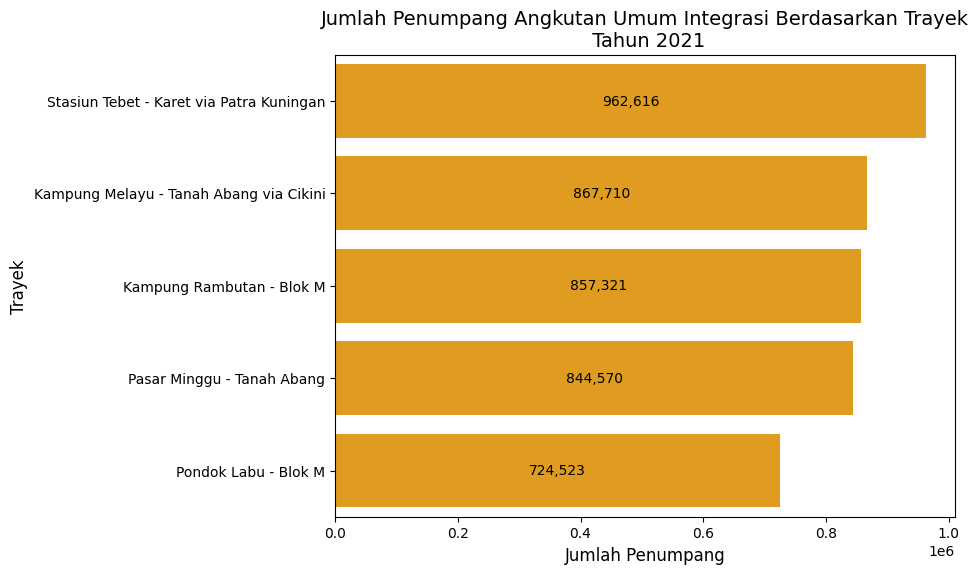

In [232]:
# Membuat barplot 5 teratas jumlah penumpang Angkutan Umum Integrasi berdasarkan trayek

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_aui_trayek_top5, x='jumlah_penumpang', y='trayek', ci=0, color='orange')
plt.title('Jumlah Penumpang Angkutan Umum Integrasi Berdasarkan Trayek\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Trayek', size = 12)

plt.show()

Berikut ini adalah 5 teratas trayek yang memberikan jumlah penumpang terbanyak untuk jenis transportasi penumpang Angkutan Umum Integrasi. Trayek dengan jurusan Stasiun Tebet - Karet via Patra Kuningan menjadi urutan pertama dengan menyumbangkan jumlah penumpang sebanyak 962616 penumpang. Kemudian trayek Pondok Labu - Blok M yang paling rendah dimana menyumbangkan jumlah penumpang sebanyak 724523 penumpang.

In [233]:
# Mencari 5 terendah jumlah penumpang berdasarkan trayek pada jenis Angkutan Umum Integrasi 

df_aui_trayek_bot5 = df_aui.groupby('trayek')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=True).head(5)
df_aui_trayek_bot5

,trayek,jumlah_penumpang
41,Taman Kota Intan - Museum Bahari,232.0
14,Kota Tua Explorer,376.0
35,Stasiun Manggarai - Ragunan,377.0
3,Dukuh Atas - Casablanca via Epicentrum Raya,608.0
27,Ragunan - Departemen Pertanian,1386.0


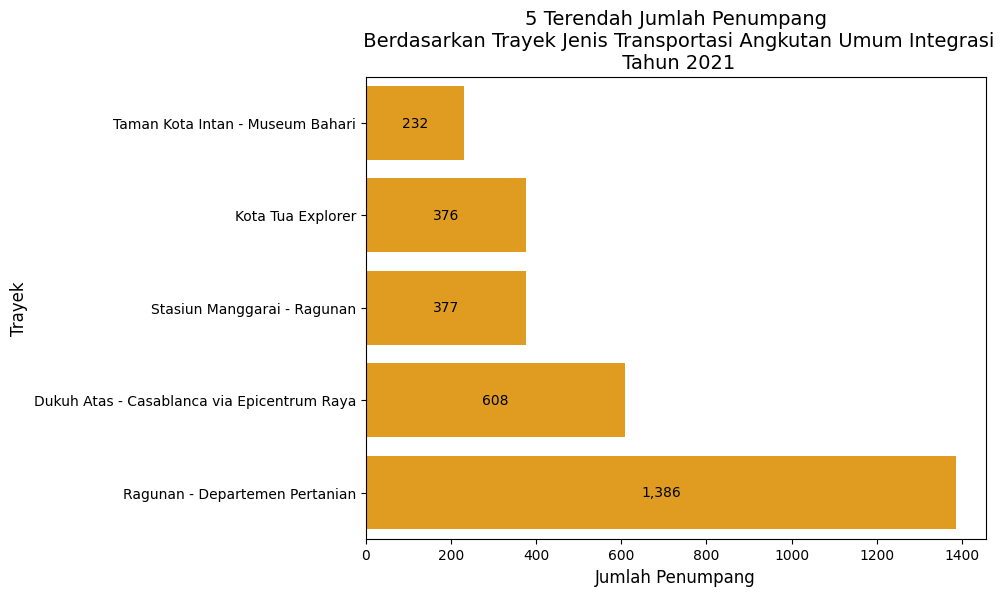

In [234]:
# Membuat barplot 5 terendah jumlah penumpang Angkutan Umum Integrasi berdasarkan trayek

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_aui_trayek_bot5, x='jumlah_penumpang', y='trayek', ci=0, color='orange')
plt.title('5 Terendah Jumlah Penumpang\n Berdasarkan Trayek Jenis Transportasi Angkutan Umum Integrasi\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Trayek', size = 12)

plt.show()

Berdasarakan grafik diatas bahwa dari 5 terendah jumlah penumpang berdasarakan trayek pada jenis transportasi Angkutan Umum Intgrasi trayek yang paling rendah dalam menyumbang jumlah penumpang yaitu pada trayek Taman Kota Intan - Museum Bahari	yaitu sebesar 232 penumpang selama tahun 2021. Kemudian dari 5 terendah tersebut trayek yang memberikan jumlah penumpang yang tinggi adalah trayek Ragunan - Departemen Pertanian sebesar 1386 penumpang.

In [235]:
# Mencari 5 teratas jumlah penumpang berdasarkan titik awal/Keberangkatan pada jenis Angkutan Umum Integrasi 

df_aui_mulai_top5 = df_aui.groupby('mulai')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head()
df_aui_mulai_top5

,mulai,jumlah_penumpang
7,Kampung Rambutan,1542411.0
6,Kampung Melayu,1168468.0
27,Stasiun Tebet,1044385.0
13,Pasar Minggu,844570.0
19,Pondok Labu,724523.0


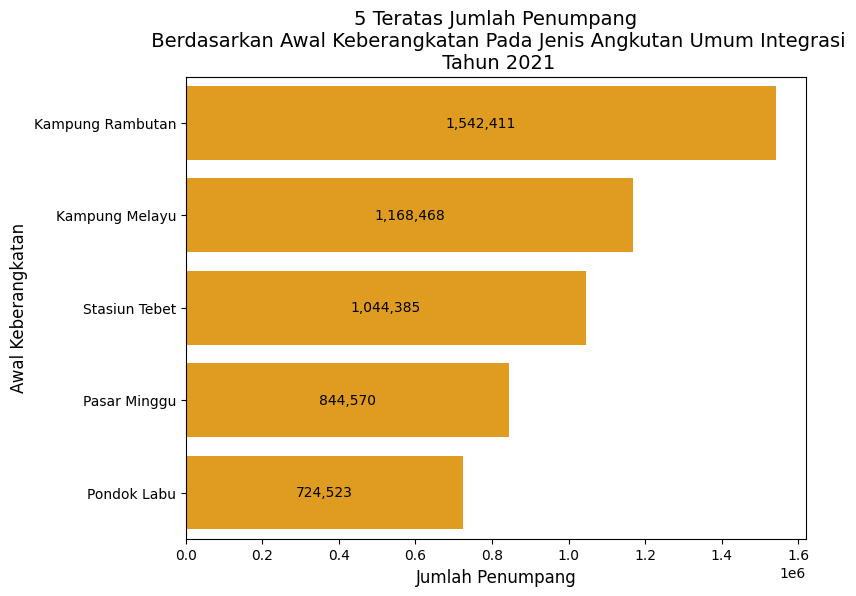

In [236]:
# Membuat barplot 5 teratas jumlah penumpang berdasarkan titik awal/Keberangkatan pada jenis Angkutan Umum Integrasi 

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_aui_mulai_top5, x='jumlah_penumpang', y='mulai', ci=0, color='orange')
plt.title('5 Teratas Jumlah Penumpang\n Berdasarkan Awal Keberangkatan Pada Jenis Angkutan Umum Integrasi\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Awal Keberangkatan', size = 12)

plt.show()

Grafik diatas bahwa dari 5 teratas jumlah penumpang berdasarakan titik awal keberangkatan pada jenis transportasi penumpang jenis Angkutan Umum Integrasi bahwa dari Halte Kampung Rambutan menjadi paling banyak menyumbangkan jumlah penumpang paling banyak yaitu sebesar 1542411 pengumpang selama tahun 2021. Kemudian dari 5 teratas tersebut Halte Pondok Labu menjadi yang terendah yaitu sebesar 724523 penumpang.

In [237]:
# Mencari 5 teratas jumlah penumpang berdasarkan titik akhir/tujuan pada jenis Angkutan Umum Integrasi

df_aui_stop_top5 = df_aui.groupby('berhenti')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head()
df_aui_stop_top5

,berhenti,jumlah_penumpang
4,Blok M,3088795.0
25,Tanah Abang,1447316.0
10,Karet via Patra Kuningan,962616.0
27,Tanah Abang via Cikini,867710.0
13,Lebak Bulus,866817.0


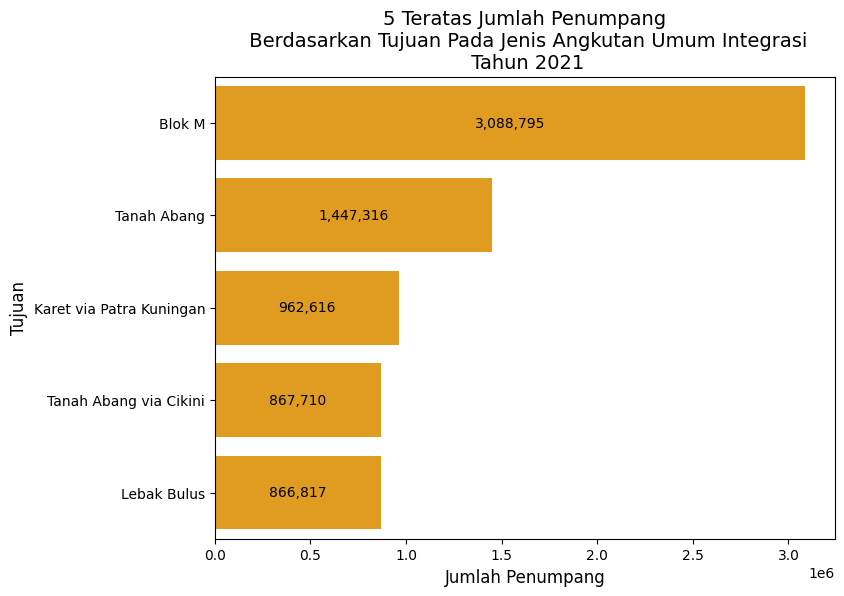

In [238]:
# Membuat barplot 5 teratas jumlah penumpang berdasarkan Tujuan pada jenis Angkutan Umum Intergasi 

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_aui_stop_top5, x='jumlah_penumpang', y='berhenti', ci=0, color='orange')
plt.title('5 Teratas Jumlah Penumpang\n Berdasarkan Tujuan Pada Jenis Angkutan Umum Integrasi\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Tujuan', size = 12)

plt.show()

Grafik diatas bahwa dari 5 teratas jumlah penumpang berdasarakan titik akhir atau tujuan pada jenis transportasi penumpang jenis Angkutan Umum Integrasi bahwa dari Halte Blok M menjadi paling banyak menyumbangkan jumlah penumpang paling banyak yaitu sebesar 3088795 pengumpang selama tahun 2021. Kemudian dari 5 teratas tersebut Halte Lebak Bulus menjadi yang terendah yaitu sebesar 866817 penumpang.

In [239]:
# Mencari 5 terendah jumlah penumpang berdasarkan titik awal keberangkatan pada jenis Angkutan Umum Integrasi

df_aui_mulai_bot5 = df_aui.groupby('mulai')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=True).head()
df_aui_mulai_bot5

,mulai,jumlah_penumpang
28,Taman Kota Intan,232.0
9,Kota Tua Explorer,376.0
3,Dukuh Atas,608.0
14,Pelabuhan Kaliadem,1463.0
30,Tanah Abang Explorer,3945.0


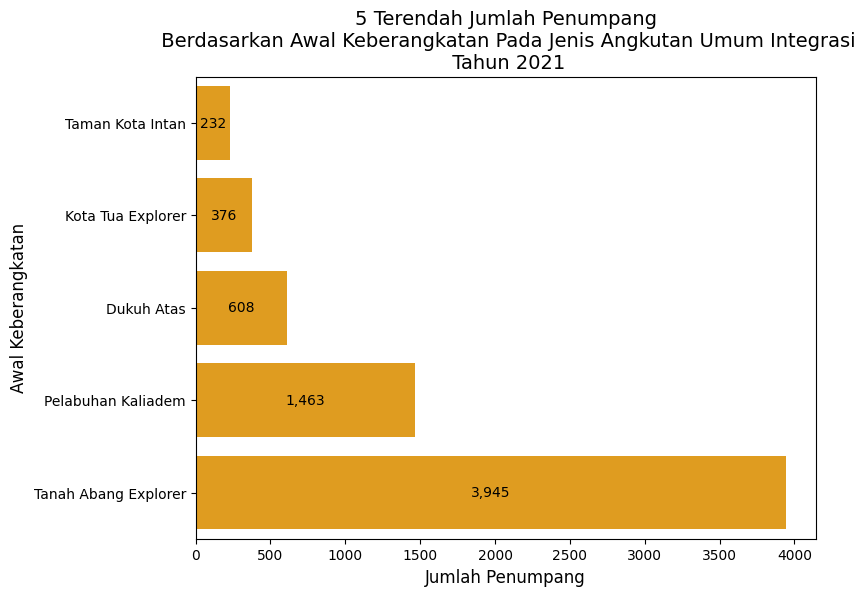

In [240]:
# Membuat barplot 5 terendah jumlah penumpang berdasarkan titik awal keberangkatan pada jenis Angkutan Umum Intgrasi 

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_aui_mulai_bot5, x='jumlah_penumpang', y='mulai', ci=0, color='orange')
plt.title('5 Terendah Jumlah Penumpang\n Berdasarkan Awal Keberangkatan Pada Jenis Angkutan Umum Integrasi\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Awal Keberangkatan', size = 12)

plt.show()

Grafik diatas bahwa dari 5 terendah jumlah penumpang berdasarakan titik awal keberangkatan pada jenis transportasi penumpang jenis Angkutan Umum Integrasi bahwa Halte Taman Kota Intan menjadi paling rendah menyumbangkan jumlah penumpang yaitu sebesar 232 pengumpang selama tahun 2021. Kemudian dari 5 terendah tersebut Halte Tanah Abang menjadi yang terbanyak yaitu sebesar 3945 penumpang.

In [241]:
# Mencari 5 terendah jumlah penumpang berdasarkan tujuan pada jenis Angkutan Umum Integrasi

df_aui_stop_bot5 = df_aui.groupby('berhenti')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=True).head()
df_aui_stop_bot5

,berhenti,jumlah_penumpang
14,Museum Bahari,232.0
12,Kota Tua Explorer,376.0
19,Ragunan,377.0
7,Casablanca via Epicentrum Raya,608.0
8,Departemen Pertanian,1386.0


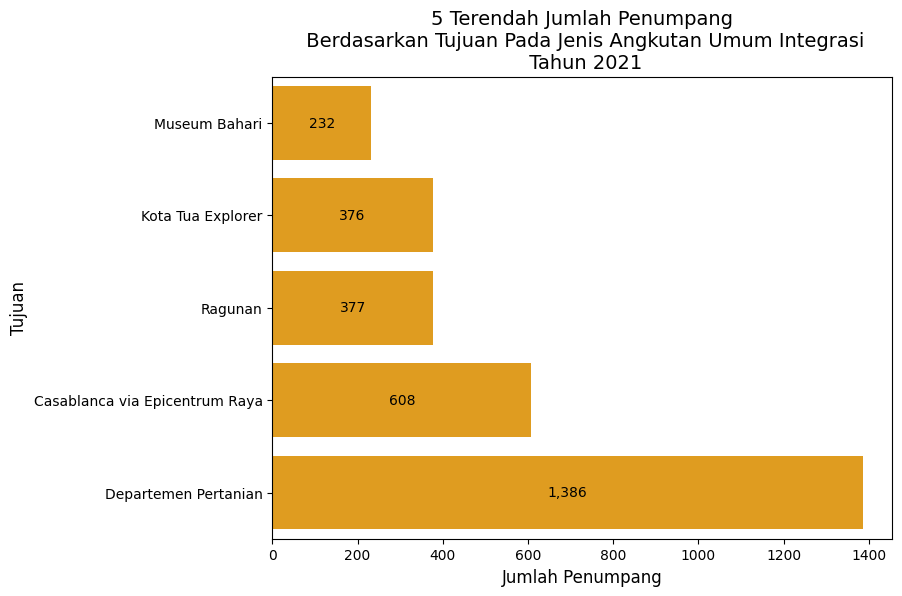

In [242]:
# Membuat barplot 5 terendah jumlah penumpang berdasarkan tujuan pada jenis Angkutan Umum Integrasi 

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_aui_stop_bot5, x='jumlah_penumpang', y='berhenti', ci=0, color='orange')
plt.title('5 Terendah Jumlah Penumpang\n Berdasarkan Tujuan Pada Jenis Angkutan Umum Integrasi\n Tahun 2021', size=14)
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{i.get_width():,.0f}' for i in bars], label_type='center')

plt.xlabel('Jumlah Penumpang', size = 12)
plt.ylabel('Tujuan', size = 12)

plt.show()

Grafik diatas bahwa dari 5 terendah jumlah penumpang berdasarakan titik akhir atau tujuan pada jenis transportasi penumpang jenis Angkutan Umum Integrasi bahwa Halte Museum Bahari menjadi paling rendah menyumbangkan jumlah penumpang yaitu sebesar 232 pengumpang selama tahun 2021. Kemudian dari 5 terendah tersebut Halte Kota menjadi yang terbanyak yaitu sebesar 1463 penumpang.

### **Choropleth**

In [243]:
import folium

In [244]:
# Membuat dataframe baru untuk jumlah penduduk Jakarta pada tahun 2021

df_pdk = pd.DataFrame({
    'Kab/Kota' : ['Kota Jakarta Timur', 'Kota Jakarta Barat', 'Kota Jakarta Selatan', 'Kota Jakarta Utara', 'Kota Jakarta Pusat'],
    'Jumlah Penduduk' : [3056300, 2440073, 2233855, 1784753, 1066460]
})

df_pdk

,Kab/Kota,Jumlah Penduduk
0,Kota Jakarta Timur,3056300
1,Kota Jakarta Barat,2440073
2,Kota Jakarta Selatan,2233855
3,Kota Jakarta Utara,1784753
4,Kota Jakarta Pusat,1066460


Jumlah penduduk Jakarta pada tahun 2021 yang dibagi menjadi beberapa wilayah yaitu Timur, Barat, Selatan, Utara dan Pusat.
Referensi untuk jumlah penduduk bisa klik [di sini](https://jakarta.bps.go.id/indicator/12/1270/1/jumlah-penduduk-menurut-kabupaten-kota-di-provinsi-dki-jakarta-.html). 

In [245]:
df_pdk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kab/Kota         5 non-null      object
 1   Jumlah Penduduk  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [246]:
# Membuat map Jakarta untuk diisi 5 teratas untuk titiak awal keberangkatan dan titik akhir/tujuan

jakarta_map_top = folium.Map(
    location=[-6.200000, 106.816666],
    zoom_start=12
)

jakarta_geojson = r'id-jk.min.geojson'

chor_kota_jkt = folium.Choropleth(
    geo_data=jakarta_geojson,                                   
    data = df_pdk,                                              
    columns=['Kab/Kota', 'Jumlah Penduduk'],         
    key_on = 'feature.properties.name'                         
)

chor_kota_jkt.add_to(jakarta_map_top)

In [247]:
# Membuat map Jakarta untuk diisi 5 terendah untuk titiak awal keberangkatan dan titik akhir/tujuan

jakarta_map_bot = folium.Map(
    location=[-6.200000, 106.816666],
    zoom_start=12
)

jakarta_geojson = r'id-jk.min.geojson'

chor_kota_jkt = folium.Choropleth(
    geo_data=jakarta_geojson,                                   
    data = df_pdk,                                              
    columns=['Kab/Kota', 'Jumlah Penduduk'],         
    key_on = 'feature.properties.name'                         
)

chor_kota_jkt.add_to(jakarta_map_bot)

In [248]:
# Membuat marker 5 teratas titik awal keberangkatan

# marker Blok M
blokM_pin = folium.Marker(
    location = [-6.241639299487796, 106.79996288476474],                                
    tooltip = 'Blok M',                                                       
    popup = 'Keberangkatan dari Halte Blok M', 
    icon = folium.Icon(
        color = 'red',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Pinang Ranti
pinagranti_pin = folium.Marker(
    location = [-6.291245655850314, 106.88628226692042],                                
    tooltip = 'Pinang Ranti',                                                       
    popup = 'Keberangkatan dari Halte Pinang Ranti', 
    icon = folium.Icon(
        color = 'red',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Kampung Rambutan
kprambutan_pin = folium.Marker(
    location = [-6.307848306492018, 106.88162472941407],                                
    tooltip = 'Kampung Rambutan',                                                       
    popup = 'Keberangkatan dari Halte Kampung Rambutan', 
    icon = folium.Icon(
        color = 'red',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Tanjung Priok
tjpriok_pin = folium.Marker(
    location = [-6.109490536093593, 106.8813800683987],                                
    tooltip = 'Tanjung Priok',                                                       
    popup = 'Keberangkatan dari Halte Tanjung Priok', 
    icon = folium.Icon(
        color = 'red',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Kampung Melayu
kp_melayu_pin = folium.Marker(
    location = [-6.2246320377923325, 106.86703148734077],                                
    tooltip = 'Kampung Melayu',                                                       
    popup = 'Keberangkatan dari Halte Kampung Melayu', 
    icon = folium.Icon(
        color = 'red',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# menambahkan marker
blokM_pin.add_to(jakarta_map_top)
pinagranti_pin.add_to(jakarta_map_top)
kprambutan_pin.add_to(jakarta_map_top)
tjpriok_pin.add_to(jakarta_map_top)
kp_melayu_pin.add_to(jakarta_map_top)



In [249]:
# Membuat marker 5 teratas titik berhenti/tujuan

# marker Kota
kota_pin = folium.Marker(
    location = [-6.135376066987085, 106.81128441124405],                                
    tooltip = 'Blok M',                                                       
    popup = 'Berheti di Halte Kota', 
    icon = folium.Icon(
        color = 'green',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Harmoni
harmoni_pin = folium.Marker(
    location = [-6.165476023771998, 106.8201305790592],                                
    tooltip = 'Harmoni',                                                       
    popup = 'Berhenti di Halte Harmoni', 
    icon = folium.Icon(
        color = 'green',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Pluit
pluit_pin = folium.Marker(
    location = [-6.115199852145596, 106.79092290584262],                                
    tooltip = 'Pluit',                                                       
    popup = 'Berhenti di Halte Pluit', 
    icon = folium.Icon(
        color = 'green',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Kampung Melayu
kpmelayu_pin = folium.Marker(
    location = [-6.224544245665139, 106.86681323711643],                                
    tooltip = 'Kampung Melayu',                                                       
    popup = 'Berhenti di Halte Kampung Melayu', 
    icon = folium.Icon(
        color = 'green',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Pasar Baru
pasarbaru_pin = folium.Marker(
    location = [-6.166032518876792, 106.83482005068736],                                
    tooltip = 'Pasar Baru',                                                       
    popup = 'Berhenti di Halte Pasar Baru', 
    icon = folium.Icon(
        color = 'green',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# menambahkan marker
kota_pin.add_to(jakarta_map_top)
harmoni_pin.add_to(jakarta_map_top)
pluit_pin.add_to(jakarta_map_top)
kpmelayu_pin.add_to(jakarta_map_top)
pasarbaru_pin.add_to(jakarta_map_top)



In [250]:
# menampilkan peta
jakarta_map_top

Dari data diatas bahwa:

dari 5 teratas/paling banyak titik awal (wanra merah) keberangkatan dan titik akhir/tujuan(warna hijau):

- Berdasarakan Choropleth diatas dengan heatmap menggunakan jumlah penduduk Jakarta yang dibagi menjadi Jakarta utara, barat, timur, selatan dan pusat. Warna biru semakin tebal menunjukan jumlah penduduk semakin banyak, jika warna memudar(putih) maka jumlah penduduk semakin rendah. Jakarta Timur menjadi daerah dengan jumlah penduduk yang paling banyak yaitu sebabnyak 3.056.300 penduduk.
- Di daerah Jakarta Timur (penduduk paling banyak) dari 5 teratas titik awal keberangkatan, terdapat 3 halte di daerah Jakarta Timur, yaitu halte Kampung Melayu, Kampung Rambutan dan Pinang Ranti.
- Kemudian dari 5 teratas titik akhir/tujuan penumpang, terdapat 2 halte di daerah Jakarta Pusat, yaitu Pasar Baru dan Harmoni.

In [251]:
# Membuat marker 5 terendah titik awal keberangkatan

# marker Taman Kota Intan
tki_pin = folium.Marker(
    location = [-6.131753714937649, 106.81236472758323],                                
    tooltip = 'Taman Kota Intan',                                                       
    popup = 'Keberangkatan dari Halte Taman Kota Intan', 
    icon = folium.Icon(
        color = 'blue',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Kota Tua
kotatua_pin = folium.Marker(
    location = [-6.132728448075474, 106.81123173259466],                                
    tooltip = 'Kota Tua Explorer',                                                       
    popup = 'Keberangkatan dari Terminal Kota Intan', 
    icon = folium.Icon(
        color = 'blue',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Dukuh Atas
dukuhatas_pin = folium.Marker(
    location = [-6.205435850191119, 106.82225351882626],                                
    tooltip = 'Dukuh Atas',                                                       
    popup = 'Keberangkatan dari Halte Dukuh Atas', 
    icon = folium.Icon(
        color = 'blue',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Pelabuhan Kaliadem
pel_kaliadem_pin = folium.Marker(
    location = [-6.104426006495987, 106.7709402118064],                                
    tooltip = 'Pelabuhan Kaliadem',                                                       
    popup = 'Keberangkatan dari Halte Pelabuhan Kaliadem', 
    icon = folium.Icon(
        color = 'blue',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Tanah Abang
tn_abang_pin = folium.Marker(
    location = [-6.185452462733497, 106.81098797962507],                                
    tooltip = 'Tanah Abang Explorer',                                                       
    popup = 'Keberangkatan dari Halte Stasiun Tanah Abang', 
    icon = folium.Icon(
        color = 'blue',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# menambahkan marker
tki_pin.add_to(jakarta_map_bot)
kotatua_pin.add_to(jakarta_map_bot)
dukuhatas_pin.add_to(jakarta_map_bot)
pel_kaliadem_pin.add_to(jakarta_map_bot)
tn_abang_pin.add_to(jakarta_map_bot)

In [252]:
# Membuat marker 5 terbawah titik tujuan

# marker Museum Bahari
mbahari_pin = folium.Marker(
    location = [-6.127599914097787, 106.80842729737924],                                
    tooltip = 'Museum Bahari',                                                       
    popup = 'Berheti di Halte Museum Bahari', 
    icon = folium.Icon(
        color = 'orange',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Casabalanca via Epicentrum Raya
casabalanca_pin = folium.Marker(
    location = [-6.224170066702676, 106.8445632137909],                                
    tooltip = 'Casabalanca via Epicentrum Raya',                                                       
    popup = 'Berhenti di Halte Casabalanca', 
    icon = folium.Icon(
        color = 'orange',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Departemen Pertanian
pertanian_pin = folium.Marker(
    location = [-6.294569079758366, 106.8221393504651],                                
    tooltip = 'Departemen Pertanian',                                                       
    popup = 'Berhenti di Halte Departemen Pertanian', 
    icon = folium.Icon(
        color = 'orange',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Cikini via Kramat Raya
cikini_pin = folium.Marker(
    location = [-6.197471118443814, 106.84090318338922],                                
    tooltip = 'Cikini via Kramat Raya',                                                       
    popup = 'Berhenti di Halte Cikini', 
    icon = folium.Icon(
        color = 'orange',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# marker Stasiun MRT Fatmawati
s_fatma_pin = folium.Marker(
    location = [-6.292326877368656, 106.793870718004],                                
    tooltip = 'Stasiun MRT Fatmawati',                                                       
    popup = 'Berhenti di Halte Stasiun MRT Fatmawati', 
    icon = folium.Icon(
        color = 'orange',
        icon = 'institution',
        prefix='fa fa-map-marker'
    )
)

# menambahkan marker
mbahari_pin.add_to(jakarta_map_bot)
casabalanca_pin.add_to(jakarta_map_bot)
pertanian_pin.add_to(jakarta_map_bot)
cikini_pin.add_to(jakarta_map_bot)
s_fatma_pin.add_to(jakarta_map_bot)

In [253]:
# menampilkan peta
jakarta_map_bot

Dari data diatas bahwa:

Dari 5 terendah/paling sedikit titik awal keberangkatan(warna biru) dan titik akhir/tujuan(warna orange):
- Didaerah Jakarta Barat terdapat 2 halte sebagai titik keberangkatan dari 5 terendah titik keberangkatan yaitu halte Taman Kota Intan dan Terminal Kota Intan. Dimana khusus yang berangkat dari Terminal Kota Intan itu adalah dengan tujuan Kota Tua Exploer (gratis).
- Kemudian didaerah Jakarta Pusat terdapat 2 halte sebagai titik keberangkatan dari 5 terendah titik keberangkatan yaitu halte Dukuh Atas dan Stasiun Tanah Abang (Tanah Abang Exploerer, gratis).
- Kemudian dari 5 terbawah titik akhir/tujuan penumpang, terdapat 3 halte di daerah Jakarta Selatan, yaitu Halte Casabalanca,Stasiun MRT Fatmawati dan Departemen Pertanian.


# **Kesimpulan dan Rekomendasi** 

**Kesimpulan**

- Sebaran penumpang selama tahun 2021 mengalami penurunan pada bulan Juni-Juli karena kebijakan PPKM adanya pembatasan dalam segala hal, termasuk transportasi massal penumpang. Namun mulai bulan Agustus jumlah penumpang meningkat kembali.
- Jenis transportasi penumpang BRT menyumbangkan jumlah penumpang paling banyak pertama. Kemudian yang kedua Mikrotrans, dan yang terakhir Angkutan Umum Integrasi.
- Berdasarakan jenis transportasi bahwa Mikrotrans memiliki jumlah trayek yang paling banyak, kemudian diikuti oleh Angkutan Umum lalu BRT.
- Trayek paling tinggi jumlah penumpang yaitu pada trayek Blok M- Kota (Jenis transport BRT).
- Trayek paling rendah jumlah penumpang yaitu pada trayek Taman Kota Intan - Museum Bahari (Jenis transport Angkutan Umum Integrasi).
- Halte Blok M menjadi penyumbang jumlah penumpang paling tinggi sebagai titik awal keberangkatan.
- Halte Kota menjadi penyumbang jumlah penumpang paling tinggi sebagai titik akhir atau tujuan.
- Halte Taman Kota Intan menjadi penyumbang jumlah penumpang paling rendah sebagai titik awal keberangkatan.
- Halte Museum Bahari penyumbang jumlah penumpang paling rendah sebagai titik akhir atau tujuan.
- Halte Tanah Abang menjadi titik awal keberangkatan paling banyak berdasarakan titik akhir atau tujuan.
- Halte Blok M menjadi titik akhir atau tujuan terbanyak sebagai penerima dari beberapa titik awal keberangkatan.


- BRT:
    - Trayek paling tinggi jumlah penumpang yaitu pada trayek Blok M - Kota.
    - Trayek paling rendah jumlah penumpang yaitu pada trayek Pulo Gebang - Kampung Melayu.
    - Penumpang paling tinggi berangkat dari Halte Blok M.
    - Penumpang paling tinggi bertujuan ke Halte Kota.
    - Penumpang paling rendah berangkat dari Halte Pulo Gebang.
    - Penumpang paling rendah bertujuan ke Halte Sunter Bouleverd Barat.

- Mikrotrans:
    - Trayek paling tinggi jumlah penumpang yaitu pada trayek Grogol - Meruya via Roxy.
    - Trayek paling rendah jumlah penumpang yaitu pada trayek Gondangdia - Cikini via Kramat Raya.
    - Penumpang paling tinggi berangkat dari Halte Tanah Abang.
    - Penumpang paling tinggi bertujuan ke Halte Rorotan.
    - Penumpang paling rendah berangkat dari Halte Gondangdia.
    - Penumpang paling rendah bertujuan ke Halte Cikini via Kramat Raya.

- Angkutan Umum Integrasi:
    - Trayek paling tinggi jumlah penumpang yaitu pada trayek Stasiun Tebet - Karet via Patra Kuningan.
    - Trayek paling rendah jumlah penumpang yaitu pada trayek Taman Kota Intan - Museum Bahari.
    - Penumpang paling tinggi berangkat dari Halte Kampung Rambutan.
    - Penumpang paling tinggi bertujuan ke Halte Blok M.
    - Penumpang paling rendah berangkat dari Halte Taman Kota Intan.
    - Penumpang paling rendah bertujuan ke Halte Museum Bahari.

- Halte Kampung Melayu menjadi yang tersibuk karena masuk dalam 5 teratas baik dari titik awal keberangkatan maupun titik akhir/tujuan.
- Daerah Jakarta Timur menjadi paling padat berdasarkan jumlah penduduk. Daerah Tersebut juga terdapat 3 halte dari 5 teratas titik awal keberangkatan paling banyak.

**Rekomendasi**

**Rekomendasi**

- BRT:
    - Menambah jumlah armada pada trayek Blok M - Kota. Selain bisa mengangkut lebih banyak penumpang, kapasitas didalam bis tidak berdesakan. Terlebih di Blok M sendiri menjadi Halte paling sibuk.
    - Bisa juga memindahkan beberapa armada dari trayek yang jumlah penumpangnya tidak terlau banyak seperti bus dengan trayek Grogol - Meruya via Roxy.


- Mikrtotrans:
    - Menambah jumlah armada jenis Mikrotrans untuk trayek Grogol - Meruya via Roxy.
    - Menambah jumlah armada terutama di trayek yang titik awal keberangkatnnya dari halte Tanah Abang.
    - Bisa juga memindahkan beberapa armada dari trayek yang jumlah penumpangnya tidak terlau banyak seperti trayek Gondangdia - Cikini via Kramat Raya.

- Angkutan Umum Integrasi:
    - Menambah jumlah armada jenis Angkutan Umum Integrasi untuk trayek Stasiun Tebet - Karet via Patra Kuningan.
    - Menambah jumlah armada terutama di trayek yang titik awal keberangkatnnya dari halte Kampung Rambutan.
    - Bisa juga memindahkan beberapa armada dari trayek yang jumlah penumpangnya tidak terlau banyak seperti trayek Taman Kota Intan - Museum Bahari.

- Menambah halte didaerah Jakarta Timur. Secara daerah tersebut merupakan daerah dengan jumlah penduduk yang paling tinggi.
- Menambah halte didaerah Jakarta Pusat. Secara didaerah tersebut terdapat 2 halte yang menjadi titik awal keberangkatan dengan jumlah penumpang terbanyak.
- Menambah halte di Daerah Jakarta Barat karena jumlah penduduk terbesar kedua.
- Melakukan perbaikan fasilitas halte Kampung Melayu. Karena sebagai salah satu penyumbang terbesar penumpang baik dari titik awal keberangkatan maupun titik akhir/tujuan, dan juga berada di Jakarta Timur dimana daerah tersebut jumah penduduknya terbesar pertama di Jakarta.
- Berkordinasi dengan petugas agar jalur khusus BRT steril dari kendaran lain, agar tepat waktu.
- Pihak perusahaan kolaboratif dalam memberikan informasi dimedia sosial mengenai trayek mana saja yang beroprasi, perunahan jadwal, perubahan rute.
- Melakukan pengembangan melalui aplikasi smartphone yang terintegrasi untuk segala transaksi maupun informasi didalamnya.

In [254]:
# Simpan DataFrame sebagai CSV
df.to_csv('cleantransjakarta2021.csv', index=False)